# Semester 1 Project Submission

## Libraries

In [ ]:
#import needed libraries
import pandas as pd
import numpy as np
import math
import collections
import scipy.stats as stats
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Importing librarys for text cleaning
import re
import math
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

#set plot space as inline for inline plots and qt for external plots
%matplotlib inline

## Elliot

In [4]:
#read tmdb file, make sure values are in the same format, and drop null values
tmdb_movie_db = pd.read_csv('databases/tmdb.movies.csv', na_filter=True, na_values='[]', encoding = 'utf-8', index_col = 0)
tmdb_movie_db.dropna()
#drop extra title column
tmdb_movie_db = tmdb_movie_db.drop('original_title', axis = 1)
#standardize release date into date format
tmdb_movie_db['release_date'] = pd.to_datetime(tmdb_movie_db['release_date'])
#strip whitespace from title
tmdb_movie_db['title'] = tmdb_movie_db['title'].str.strip()
#remove duplicates
tmdb_movie_db = tmdb_movie_db.drop_duplicates()

tmdb_movie_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,0.600,2018-06-22,Trailer Made,0.0,1


Movie Genre Key

Action: 28 Adventure: 12 Animation: 16 Comedy: 35 Crime: 80 Documentary: 99 Drama: 18 Family: 10751 Fantasy: 14 History: 36 Horror: 27 Music: 10402 Mystery: 9648 Romance: 10749 Science Fiction: 878 TV Movie: 10770 Thriller: 53 War: 10752 Western: 37

Popularity Model is based on:

Number of votes for the day

Number of views for the day

Number of users who marked it as a "favourite" for the day

Number of users who added it to their "watchlist" for the day

Release date

Number of total votes

Previous days score

In [ ]:
#information regarding The Movie Database
tmdb_movie_db.info()

In [ ]:
#check to see if there any null values
tmdb_movie_db.isnull().sum()

In [ ]:
#check to see that there are no duplicates
tmdb_movie_db.duplicated().value_counts() 

In [ ]:
#view shape of data
tmdb_movie_db.shape

## The Numbers Data Cleanse

In [ ]:
#read tn file, make sure values are in the same format, and drop null values
tn_movie_db = pd.read_csv('databases/tn.movie_budgets.csv', na_filter=True, na_values='[]', encoding = 'utf-8', index_col = 0)
tn_movie_db.dropna()
#standardize release date into date format
tn_movie_db['release_date'] = pd.to_datetime(tn_movie_db['release_date'])
#strip whitespace from title
tn_movie_db['movie'] = tn_movie_db['movie'].str.strip()
#strip $
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].str.strip('$')
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].str.strip('$')
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].str.strip('$')
#remove ,
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].replace(",", "", regex=True)
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].replace(",", "", regex=True)
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].replace(",", "", regex=True)
#convert to integers
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].astype(int)
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].astype(int)
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].astype(float)
#create metric ratios
tn_movie_db['dom_gross / budget'] = tn_movie_db['domestic_gross'] / tn_movie_db['production_budget']
tn_movie_db['ww_gross / budget'] = tn_movie_db['worldwide_gross'] / tn_movie_db['production_budget']
tn_movie_db['dom_profit'] = tn_movie_db['domestic_gross'] - tn_movie_db['production_budget']
tn_movie_db['profit'] = tn_movie_db['worldwide_gross'] - tn_movie_db['production_budget']

tn_movie_db

In [ ]:
#information regarding The Numbers
tn_movie_db.info()

In [ ]:
#check to see if there any null values
tn_movie_db.isnull().sum()

In [ ]:
#check to see that there are no duplicates
tn_movie_db.duplicated().value_counts() 

In [ ]:
#view shape of data
tn_movie_db.shape

## Data Visualization

Merge both tables to combine data to connect genres to production costs and boxoffice revenue

In [ ]:
#merge title and movie name
tn_movie_db = tn_movie_db.rename(columns = {"movie":"title"})

#special cases where movie titles do not match
tn_movie_db['title'].replace({'Harry Potter and the Deathly Hallows: Part I' : 'Harry Potter and the Deathly Hallows: Part 1'}, inplace=True)
tn_movie_db['title'].replace({'Harry Potter and the Deathly Hallows: Part II' : 'Harry Potter and the Deathly Hallows: Part 2'}, inplace=True)
tmdb_movie_db['title'].replace({'Fast & Furious 6':'Fast and Furious 6'}, inplace=True)
tn_movie_db['title'].replace({'Star Wars: The Force Awakens' : 'Star Wars Ep. VII: The Force Awakens'}, inplace=True)
tn_movie_db['title'].replace({'Star Wars: The Last Jedi' : 'Star Wars Ep. VIII: The Last Jedi'}, inplace=True)

#merge databases
movie_db = tmdb_movie_db.merge(tn_movie_db, how = 'left')

#drop null values
movie_db = movie_db.dropna()

movie_db

Remove outliers

In [ ]:
#check to see if worldwide_gross and domestic_gross is 0 to remove outliers
dcount = 0
for x in movie_db['domestic_gross']:
    if x == 0:
        dcount += 1
print(dcount)

wwcount = 0
for x in movie_db['worldwide_gross']:
    if x == 0:
        wwcount += 1
print(wwcount)

In [ ]:
#remove values that have 0 in the domestic_gross column
new_movie_db = movie_db.drop(movie_db[movie_db['domestic_gross'] < 1].index)
new_movie_db

In [ ]:
#check to make sure that there are no values with 0
new_movie_db.loc[movie_db['worldwide_gross'] < 1]
sorted(new_movie_db['worldwide_gross'].value_counts().index.to_list())

In [ ]:
#information regarding new db
new_movie_db.dtypes

### Domestic Revenue per Rating Graph

In [ ]:
#determine outliers
p25 = np.percentile(new_movie_db['domestic_gross'], 25)
p75 = np.percentile(new_movie_db['domestic_gross'], 75)
iqr = p75 - p25
outlier = p75 + (1.5 * iqr)
#create db that removes upper outliers
dr_movie_db = new_movie_db.drop(new_movie_db[new_movie_db['domestic_gross'] > outlier].index)
dr_movie_db

In [ ]:
#graph visual
x = dr_movie_db['vote_average']

y = dr_movie_db['domestic_gross']

plt.scatter(x, y)
plt.xlabel('Rating')
plt.ylabel('Domestic Revenue')
plt.title('Domestic Revenue per Rating')

plt.show()

In [ ]:
#create line of best fit
sns.lmplot(x = 'vote_average', y = 'domestic_gross', data = dr_movie_db, height = 8, aspect = 1.5);

### Worldwide Revenue per Rating Graph

In [ ]:
#determine outliers
p25 = np.percentile(new_movie_db['worldwide_gross'], 25)
p75 = np.percentile(new_movie_db['worldwide_gross'], 75)
iqr = p75 - p25
outlier = p75 + (1.5 * iqr)
#create db that removes upper outliers
wwr_movie_db = new_movie_db.drop(new_movie_db[new_movie_db['worldwide_gross'] > outlier].index)
wwr_movie_db

In [ ]:
#graph visual
x = wwr_movie_db['vote_average']

y = wwr_movie_db['worldwide_gross']

plt.scatter(x, y)
plt.xlabel('Rating')
plt.ylabel('Worldwide Revenue (hundred million $)')
plt.title('Worldwide Revenue per Rating')
plt.show()

In [ ]:
#create line of best fit
sns.lmplot(x = 'vote_average', y = 'worldwide_gross', data = wwr_movie_db, height = 8, aspect = 1.5);

### Domestic Profit per Rating Graph

In [ ]:
#graph visual
x = new_movie_db['vote_average']

y = new_movie_db['dom_profit']

plt.scatter(x, y)
plt.xlabel('Rating')
plt.ylabel('Domestic Profit')
plt.title('Domestic Profit per Rating')
plt.show()

In [ ]:
#create line of best fit
sns.lmplot(x = 'vote_average', y = 'dom_profit', data = new_movie_db, height = 8, aspect = 1.5);

### Profit per Rating Graph

In [ ]:
#determine outliers
p25 = np.percentile(new_movie_db['profit'], 25)
p75 = np.percentile(new_movie_db['profit'], 75)
iqr = p75 - p25
outlier = p75 + (1.5 * iqr)
#create db that removes upper outliers
wwp_movie_db = new_movie_db.drop(new_movie_db[new_movie_db['worldwide_gross'] > outlier].index)
wwp_movie_db

In [ ]:
#determine outliers
p25 = np.percentile(wwp_movie_db['vote_average'], 25)
p75 = np.percentile(wwp_movie_db['vote_average'], 75)
iqr = p75 - p25
outlier = p75 + (1.5 * iqr)
#create db that removes upper outliers
wwp1_movie_db = wwp_movie_db.drop(wwp_movie_db[wwp_movie_db['vote_average'] > outlier].index)
wwp1_movie_db

In [ ]:
#graph visual
x = wwp1_movie_db['vote_average']

y = wwp1_movie_db['profit']

plt.scatter(x, y)
plt.xlabel('Rating')
plt.ylabel('Profit (hundred million $)')
plt.title('Profit per Rating')
plt.show()

In [ ]:
#create line of best fit
sns.lmplot(x = 'vote_average', y = 'profit', data = wwp1_movie_db, height = 8, aspect = 1.5);

### Domestic Revenue per Budget Graph

In [ ]:
#graph visual
x = new_movie_db['production_budget']

y = new_movie_db['domestic_gross']

plt.scatter(x, y)
plt.xlabel('Budget')
plt.ylabel('Domestic Revenue')
plt.title('Domestic Revenue per Budget')
plt.show()

In [ ]:
#create line of best fit
sns.lmplot(x = 'production_budget', y = 'domestic_gross', data = new_movie_db, height = 8, aspect = 1.5);

### Worldwide Revenue per Budget Graph

In [ ]:
#graph visual
x = new_movie_db['production_budget']

y = new_movie_db['worldwide_gross']

plt.scatter(x, y)
plt.xlabel('Budget')
plt.ylabel('Worldwide Revenue')
plt.title('Worldwide Revenue per Budget')
plt.show()

In [ ]:
#create line of best fit
sns.lmplot(x = 'production_budget', y = 'worldwide_gross', data = new_movie_db, height = 8, aspect = 1.5);

### Domestic Revenue per Popularity Rating Graph

In [ ]:
#determine outliers
p25 = np.percentile(new_movie_db['popularity'], 25)
p75 = np.percentile(new_movie_db['popularity'], 75)
iqr = p75 - p25
outlier = p75 + (1.5 * iqr)
#create db that removes upper outliers
popularity_movie_db = new_movie_db.drop(new_movie_db[new_movie_db['popularity'] > outlier].index)
popularity_movie_db

In [ ]:
#determine outliers
p25 = np.percentile(popularity_movie_db['domestic_gross'], 25)
p75 = np.percentile(popularity_movie_db['domestic_gross'], 75)
iqr = p75 - p25
outlier = p75 + (1.5 * iqr)
#create db that removes upper outliers
popularity1_movie_db = popularity_movie_db.drop(popularity_movie_db[popularity_movie_db['domestic_gross'] > outlier].index)
popularity1_movie_db

In [ ]:
#graph visual
x = popularity1_movie_db['popularity']

y = popularity1_movie_db['domestic_gross']

plt.scatter(x, y)
plt.xlabel('Popularity')
plt.ylabel('Domestic Revenue')
plt.title('Domestic Revenue per Popularity')
plt.show()

In [ ]:
#create line of best fit
sns.lmplot(x = 'popularity', y = 'domestic_gross', data = popularity1_movie_db, height = 8, aspect = 1.5);

### Worldwide Revenue per Popularity Rating Graph

In [ ]:
#determine outliers
p25 = np.percentile(popularity_movie_db['worldwide_gross'], 25)
p75 = np.percentile(popularity_movie_db['worldwide_gross'], 75)
iqr = p75 - p25
outlier = p75 + (1.5 * iqr)
#create db that removes upper outliers
popularity2_movie_db = popularity_movie_db.drop(popularity_movie_db[popularity_movie_db['worldwide_gross'] > outlier].index)
popularity2_movie_db

In [ ]:
#graph visual
x = popularity2_movie_db['popularity']

y = popularity2_movie_db['worldwide_gross']

plt.scatter(x, y)
plt.xlabel('Popularity')
plt.ylabel('Worldwide Revenue (hundred million $)')
plt.title('Worldwide Revenue per Popularity')
plt.show()

In [ ]:
#create line of best fit
sns.lmplot(x = 'popularity', y = 'worldwide_gross', data = popularity2_movie_db, height = 8, aspect = 1.5);

### Domestic Profit per Popularity Rating Graph

In [ ]:
#determine outliers
p25 = np.percentile(popularity_movie_db['dom_profit'], 25)
p75 = np.percentile(popularity_movie_db['dom_profit'], 75)
iqr = p75 - p25
outlier = p75 + (1.5 * iqr)
#create db that removes upper outliers
popularity3_movie_db = popularity_movie_db.drop(popularity_movie_db[popularity_movie_db['dom_profit'] > outlier].index)
popularity3_movie_db

In [ ]:
#determine outliers
p25 = np.percentile(popularity3_movie_db['dom_profit'], 25)
p75 = np.percentile(popularity3_movie_db['dom_profit'], 75)
iqr = p75 - p25
outlier = p25 - (1.5 * iqr)
#create db that removes lower outliers
popularity4_movie_db = popularity3_movie_db.drop(popularity3_movie_db[popularity3_movie_db['dom_profit'] < outlier].index)
popularity4_movie_db

In [ ]:
#graph visual including outliers
x = popularity4_movie_db['popularity']

y = popularity4_movie_db['dom_profit']

plt.scatter(x, y)
plt.xlabel('Popularity')
plt.ylabel('Domestic Profit')
plt.title('Domestic Profit per Popularity')
plt.show()

In [ ]:
#create line of best fit
sns.lmplot(x = 'popularity', y = 'dom_profit', data = popularity4_movie_db, height = 8, aspect = 1.5);

### Profit per Popularity Rating Graph

In [ ]:
#determine outliers
p25 = np.percentile(popularity_movie_db['profit'], 25)
p75 = np.percentile(popularity_movie_db['profit'], 75)
iqr = p75 - p25
outlier = p75 + (1.5 * iqr)
#create db that removes upper outliers
popularity5_movie_db = popularity_movie_db.drop(popularity_movie_db[popularity_movie_db['profit'] > outlier].index)
popularity5_movie_db

In [ ]:
#graph visual
x = popularity5_movie_db['popularity']

y = popularity5_movie_db['profit']

plt.scatter(x, y,)
plt.xlabel('Popularity')
plt.ylabel('Profit (hundred million $)')
plt.title('Profit per Popularity')
plt.show()

In [ ]:
#create line of best fit
sns.lmplot(x = 'popularity', y = 'profit', data = popularity5_movie_db, height = 8, aspect = 1.5);

### Hypothesis Testing

In [ ]:
#population must have more than 100 votes
population_movie_db = new_movie_db.drop(new_movie_db[new_movie_db['vote_count'] < 100].index)
population_movie_db

In [ ]:
#sample must have a vote average higher than 6
sample_movie_db = new_movie_db.drop(new_movie_db[new_movie_db['vote_average'] < 6].index)
sample_movie_db

In [ ]:
#import needed libraries
import scipy.stats as stats
from math import sqrt

### Does rating have an impact on worldwide revenue?

Ho: There is no relationship between ratings and worldwide revenue

Ha: There is a relationship between ratings and worldwide revenue

In [ ]:
#Run a two tail z test using a 95% confidence level
alpha = 0.025
x_bar = sample_movie_db['worldwide_gross'].mean() #sample mean 
n = sample_movie_db['worldwide_gross'].count() #number of samples
sigma = population_movie_db['worldwide_gross'].std() #std of population
mu = population_movie_db['worldwide_gross'].mean() #population mean 

#calculate the z score 
z = (x_bar - mu) / (sigma / sqrt(n))
z

In [ ]:
#calculate p-value
pval = 1 - stats.norm.cdf(z)
pval

In [ ]:
#view results to identify if statistically significant
print('p-value', pval)
print('alpha', alpha)

if pval < alpha:
    print('Reject Null Hypothesis')
elif pval >= alpha:
    print('Fail to Reject Null Hypothesis')

### Does rating have an impact on profit?

Ho: There is no relationship between ratings and profit

Ha: There is a relationship between ratings and profit

In [ ]:
#Run a two tail z test using a 95% confidence level
alpha = 0.025
x_bar = sample_movie_db['profit'].mean() # sample mean 
n = sample_movie_db['profit'].count() # number
sigma = population_movie_db['profit'].std() # std of population
mu = population_movie_db['profit'].mean() # Population mean 

#calculate the z score 
z = (x_bar - mu) / (sigma / sqrt(n))
z


In [ ]:
#calculate p-value
pval = 1 - stats.norm.cdf(z)
pval

In [ ]:
#view results to identify if statistically significant
print('p-value', pval)
print('alpha', alpha)

if pval < alpha:
    print('Reject Null Hypothesis')
elif pval >= alpha:
    print('Fail to Reject Null Hypothesis')

In [ ]:
# normalizing distribution with for loop
samp_standardized_rating = [(x-mu)/sigma for x in sample_movie_db['profit']]
z_mean = np.mean(samp_standardized_rating)
print(f' Standardized Sample Mean: {z_mean}')

In [ ]:
# visualizing above distribution as histogram
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(samp_standardized_rating, bins=15, density=True, color='r')
ax.set_xlabel('Z Scores')
ax.set_title('Profit per Movie Rating')

# applying normalized curve over histogram
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

# marking standardized_mean
ax.vlines(x=z_mean, ymin=0, ymax=0.7, color='b', label='Mean: 0.2331')
ax.legend()

In [ ]:
# standardizing population for secondary visualizations to follow
mu = population_movie_db['profit'].mean()
std = population_movie_db['profit'].std()

pop_standardized_rating = [(x-mu)/std for x in population_movie_db['profit']]
pop_z_mean = np.mean(pop_standardized_rating)
pop_z_mean

In [ ]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(pop_standardized_rating, bins=45, density=True, color='b', alpha = 0.5)
sns.kdeplot(pop_standardized_rating, ax=ax, color='y')

plt.hist(samp_standardized_rating, bins=15, density=True, color='r', alpha = 0.5)
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

plt.vlines(x=z_mean, ymin=0, ymax=0.7, color='m', label='Sample Mean: 0.2331')
plt.vlines(x=pop_z_mean, ymin=0, ymax=0.7, label='Population Mean: 0.0')
                                              
plt.xlabel('Z Scores')
plt.title('Profit per Movie Rating')
plt.legend()

In [ ]:
#graph visual
x = sample_movie_db['vote_average']

y = sample_movie_db['profit']

plt.bar(x, y)
plt.xlabel('Movie Rating')
plt.ylabel('Profit (in hundred million $)')
plt.title('Profit per Movie Rating')
plt.show()

### Does popularity have an impact on worldwide revenue?

Ho: There is no relationship between popularity and worldwide revenue

Ha: There is a relationship between popularity and worldwide revenue

In [ ]:
#sample must have a popularity rating higher than 10
sample_movie_db = new_movie_db.drop(new_movie_db[new_movie_db['popularity'] < 10].index)
sample_movie_db

In [ ]:
#Run a two tail z test using a 95% confidence level
alpha = 0.025
x_bar = sample_movie_db['worldwide_gross'].mean() #sample mean 
n = sample_movie_db['worldwide_gross'].count() #number of samples
sigma = new_movie_db['worldwide_gross'].std() #std of population
mu = new_movie_db['worldwide_gross'].mean() #population mean 

#calculate the z score 
z = (x_bar - mu) / (sigma / sqrt(n))
z

In [ ]:
#calculate p-value
pval = 1 - stats.norm.cdf(z)
pval

In [ ]:
#view results to identify if statistically significant
print('p-value', pval)
print('alpha', alpha)

if pval < alpha:
    print('Reject Null Hypothesis')
elif pval >= alpha:
    print('Fail to Reject Null Hypothesis')

In [ ]:
# normalizing distribution with for loop
samp_standardized_rating = [(x-mu)/sigma for x in sample_movie_db['worldwide_gross']]
z_mean = np.mean(samp_standardized_rating)
print(f' Standardized Sample Mean: {z_mean}')

In [ ]:
# visualizing above distribution as histogram
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(samp_standardized_rating, bins=15, density=True, color='r')
ax.set_xlabel('Z Scores')
ax.set_title('Worldwide Revenue per Popularity')

# applying normalized curve over histogram
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

# marking standardized_mean
ax.vlines(x=z_mean, ymin=0, ymax=0.7, color='b', label='Mean: 0.4928')
ax.legend()

In [ ]:
# standardizing population for secondary visualizations to follow
mu = new_movie_db['worldwide_gross'].mean()
std = new_movie_db['worldwide_gross'].std()

pop_standardized_rating = [(x-mu)/std for x in new_movie_db['worldwide_gross']]
pop_z_mean = np.mean(pop_standardized_rating)
pop_z_mean

In [ ]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(pop_standardized_rating, bins=45, density=True, color='b', alpha = 0.5)
sns.kdeplot(pop_standardized_rating, ax=ax, color='y')

plt.hist(samp_standardized_rating, bins=15, density=True, color='r', alpha = 0.5)
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

plt.vlines(x=z_mean, ymin=0, ymax=0.7, color='m', label='Sample Mean: 0.4928')
plt.vlines(x=pop_z_mean, ymin=0, ymax=0.7, label='Population Mean: 0.0')
                                              
plt.xlabel('Z Scores')
plt.title('Worldwide Revenue per Movie Rating')
plt.legend()

In [ ]:
#graph visual
x = sample_movie_db['popularity']

y = sample_movie_db['worldwide_gross']

plt.bar(x, y)
plt.xlabel('Movie Popularity')
plt.ylabel('Worldwide Revenue')
plt.title('Worldwide Revenue per Movie Popularity')
plt.show()

### Does popularity have an impact on profit?

Ho: There is no relationship between popularity and profit

Ha: There is a relationship between popularity and profit

In [ ]:
alpha = 0.05
x_bar = sample_movie_db['profit'].mean() #sample mean 
n = sample_movie_db['profit'].count() #number of samples
sigma = new_movie_db['profit'].std() #std of population
mu = new_movie_db['profit'].mean() #population mean 

#calculate the z score 
z = (x_bar - mu) / (sigma / sqrt(n))
z

In [ ]:
#calculate p-value
pval = 1 - stats.norm.cdf(z)
pval

In [ ]:
#view results to identify if statistically significant
print('p-value', pval)
print('alpha', alpha)

if pval < alpha:
    print('Reject Null Hypothesis')
elif pval >= alpha:
    print('Fail to Reject Null Hypothesis')

In [ ]:
# normalizing distribution with for loop
samp_standardized_rating = [(x-mu)/sigma for x in sample_movie_db['profit']]
z_mean = np.mean(samp_standardized_rating)
print(f' Standardized Sample Mean: {z_mean}')

In [ ]:
# visualizing above distribution as histogram
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(samp_standardized_rating, bins=15, density=True, color='r')
ax.set_xlabel('Z Scores')
ax.set_title('Profit per Popularity')

# applying normalized curve over histogram
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

# marking standardized_mean
ax.vlines(x=z_mean, ymin=0, ymax=0.7, color='b', label='Mean: 0.0042')
ax.legend()

In [ ]:
# standardizing population for secondary visualizations to follow
mu = new_movie_db['profit'].mean()
std = new_movie_db['profit'].std()

pop_standardized_rating = [(x-mu)/std for x in new_movie_db['profit']]
pop_z_mean = np.mean(pop_standardized_rating)
pop_z_mean

In [ ]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(pop_standardized_rating, bins=45, density=True, color='b', alpha = 0.5)
sns.kdeplot(pop_standardized_rating, ax=ax, color='y')

plt.hist(samp_standardized_rating, bins=15, density=True, color='r', alpha = 0.5)
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

plt.vlines(x=z_mean, ymin=0, ymax=0.7, color='m', label='Sample Mean: 0.0042')
plt.vlines(x=pop_z_mean, ymin=0, ymax=0.7, label='Population Mean: 0.0')
                                              
plt.xlabel('Z Scores')
plt.title('Profit per Movie Rating')
plt.legend()

### Statistics

In [ ]:
#average production budget from other released movies
new_movie_db['production_budget'].mean()

In [ ]:
#average domestic revenue from other released movies
new_movie_db['domestic_gross'].mean()

In [ ]:
#average production budget from other released movies
new_movie_db['worldwide_gross'].mean()

In [ ]:
#average domestic revenue multiplier based on production budget from other released movies
new_movie_db['dom_gross / budget'].mean()

In [ ]:
#average worldwide revenue multiplier based on production budget
new_movie_db['ww_gross / budget'].mean()

In [ ]:
#average domestic profits from other released movies
new_movie_db['dom_profit'].mean()


In [ ]:
#average worldwide profits from other released movies
new_movie_db['profit'].mean()

In [ ]:
#average movie rating
new_movie_db['vote_average'].mean()

In [ ]:
#average movie popularity rating
new_movie_db['popularity'].mean()

In [ ]:
#information regarding genres
movie_db['genre_ids'].value_counts()

## Ian

In [ ]:
# Your code here - remember to use markdown cells for comments as well!

## Frida

### Working with Data Info File
#### Objective: Find the most popular genres and movie themes in the last decades in order to recomend movie content for the films.


In [21]:
# Importing modules
import pandas as pd
import math
import numpy as np
import collections
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Reading the "Movie info" file
movie_info_df = pd.read_csv('databases/rt.movie_info.tsv', sep='\t', encoding = 'utf-8', index_col=0)
movie_info_df.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


### Data Cleaning

In [9]:
# Data frame overview. Column information, name-data type.
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [10]:
# Counting missing values
movie_info_df.isna().sum()

# Removing duplicate records
movie_info_df = movie_info_df.drop_duplicates()

# Changing NaN values for String "Not Available"
movie_info_df['rating'] = movie_info_df['rating'].fillna('N/A')
movie_info_df['genre'] = movie_info_df['genre'].fillna('N/A')
movie_info_df['director'] = movie_info_df['director'].fillna('N/A')
movie_info_df['theater_date'] = movie_info_df['theater_date'].fillna('N/A')
movie_info_df['dvd_date'] = movie_info_df['dvd_date'].fillna('N/A')
movie_info_df['runtime'] = movie_info_df['runtime'].fillna('N/A')
movie_info_df['studio'] = movie_info_df['studio'].fillna('N/A')
movie_info_df['writer'] = movie_info_df['writer'].fillna('N/A')

In [11]:
# Changing NaN values for 0 in Box Office column
movie_info_df['box_office'] = movie_info_df['box_office'].fillna(0)

# Remmoving commas from Box Office values
movie_info_df['box_office'] = movie_info_df['box_office'].replace({',':''}, regex=True)

# Converting Box Office values into Integers
movie_info_df['box_office'] = movie_info_df['box_office'].astype(float)

In [12]:
# Checking possible Currency values
currency_values = set(movie_info_df.loc[:,"currency"])

# Changing NaN values for "$" in Currency column since is the only currency in the DB
movie_info_df['currency'] = movie_info_df['currency'].fillna('$')

In [13]:
"""
Note: The information that we are interested in extracting from this database is the synopsis of each film, 
therefore, we have decided to delete those rows that do not have one.
"""
# Dropping rows with no synopsis
cleansed_movie_info = movie_info_df.dropna(subset=['synopsis'])

# Confirming that there in no more NaN values in our cleansed Data Frame
cleansed_movie_info.isna().sum() # No more NaN values! We can start our analysis using the cleansed_movie_info DF

synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

### Creating new Data Frame to work on

In [14]:
"""
Note: In order to analyze the most popular movies per year and genre, 
we created a new Data Frame containing only the Synopsis, Rating, Genres, Theater Date and Box Office.
"""

'\nNote: In order to analyze the most popular movies per year and genre, \nwe created a new Data Frame containing only the Synopsis, Rating, Genres, Theater Date and Box Office.\n'

In [15]:
# Sppliting the theater date, keeping only the year.
only_year = cleansed_movie_info["theater_date"].str.split(",", n = 1, expand = True)
# Creating columns for new DF
years = np.array(only_year[1])
# converting Year string into float
years = years.astype(np.float) 

synopsis = np.array(cleansed_movie_info["synopsis"])
ratings = np.array(cleansed_movie_info["rating"])
box_office = np.array(cleansed_movie_info["box_office"])

# Creating Main Movie Info DF
main_movie_info = pd.DataFrame() 

# Adding columns to new DF
main_movie_info['Synopsis'] = synopsis
main_movie_info['Ratings'] = ratings
main_movie_info['Box Office'] = box_office
main_movie_info['Years'] = years
main_movie_info['Years'] = main_movie_info['Years'].fillna(0) # Filling with 0 the empty records

C:\Users\fmartinezflores\AppData\Local\Temp\ipykernel_15324\4214444057.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  years = years.astype(np.float)


In [16]:
#  Sppliting the Genres into different columns
split_genre = cleansed_movie_info["genre"].str.split("|", n = 6, expand = True)

# Some movies have more than five different genres
genre1 = np.array(split_genre[0])
genre2 = np.array(split_genre[1])
genre3 = np.array(split_genre[2])
genre4 = np.array(split_genre[3])
genre5 = np.array(split_genre[4])
genre6 = np.array(split_genre[5])
genre7 = np.array(split_genre[6])

# # Adding a column for each genre in the new DF
main_movie_info['Genre 1'] = genre1
main_movie_info['Genre 2'] = genre2
#main_movie_info['Genre 3'] = genre3
#main_movie_info['Genre 4'] = genre4
#main_movie_info['Genre 5'] = genre5
#main_movie_info['Genre 6'] = genre6
#main_movie_info['Genre 7'] = genre7

"""
Note: We decided to leave only 2 genre columns because most of the films only have 2 types of genres
"""
# main_movie_info overview
main_movie_info.head()

,Synopsis,Ratings,Box Office,Years,Genre 1,Genre 2
0,"This gritty, fast-paced, and innovative police...",R,0.0,1971.0,Action and Adventure,Classics
1,"New York City, not-too-distant-future: Eric Pa...",R,600000.0,2012.0,Drama,Science Fiction and Fantasy
2,Illeana Douglas delivers a superb performance ...,R,0.0,1996.0,Drama,Musical and Performing Arts
3,Michael Douglas runs afoul of a treacherous su...,R,0.0,1994.0,Drama,Mystery and Suspense
4,The year is 1942. As the Allies unite overseas...,PG,0.0,2000.0,Drama,Kids and Family


### Analyzing the data


#### How many movies have been filmed in the last decades?

In [17]:
# Preparing data by filtering movies per Decade
_20sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1920) & (main_movie_info['Years'] <= 1929)]
_30sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1930) & (main_movie_info['Years'] <= 1939)]
_40sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1940) & (main_movie_info['Years'] <= 1949)]
_50sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1950) & (main_movie_info['Years'] <= 1959)]
_60sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1960) & (main_movie_info['Years'] <= 1969)]
_70sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1970) & (main_movie_info['Years'] <= 1979)]
_80sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1980) & (main_movie_info['Years'] <= 1989)]
_90sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1990) & (main_movie_info['Years'] <= 1999)]
_00sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 2000) & (main_movie_info['Years'] <= 2009)]
_2010sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 2010) & (main_movie_info['Years'] <= 2019)]

# Counting movies per decade
decades = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1999, 2000, 2010]
movies_per_decade = [len(_20sfilms),len(_30sfilms),len(_40sfilms),len(_50sfilms),len(_60sfilms),len(_70sfilms),len(_80sfilms),len(_90sfilms),len(_00sfilms),len(_2010sfilms)]

print('_________________________________________________________\n')
print('How many movies have been filmed in the last decades?\n')
print('Movies Per Decade:')
for x,y in zip(decades,movies_per_decade):
    print(x,y)
print('_________________________________________________________\n')

_________________________________________________________

How many movies have been filmed in the last decades?

Movies Per Decade:
1920 5
1930 14
1940 40
1950 55
1960 72
1970 64
1980 163
1999 266
2000 314
2010 204
_________________________________________________________



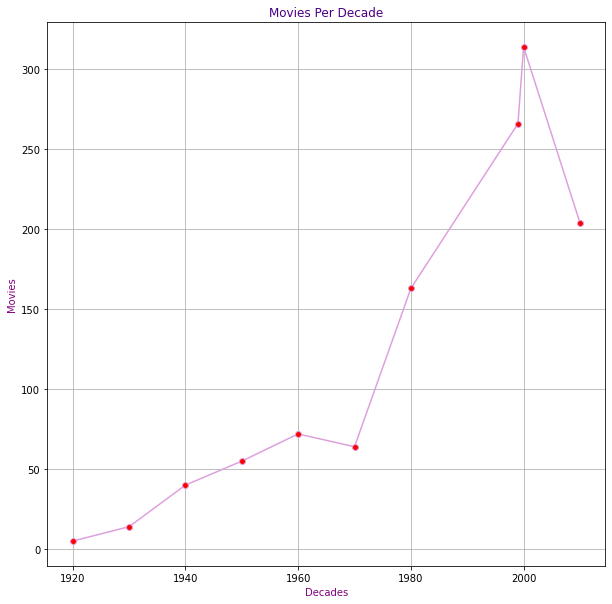

In [18]:
# Visualizing data
x_decades = decades
y_count = movies_per_decade

# Graph attributes
plt.figure(figsize=(10,10))
plt.xlabel('Decades', color='purple')
plt.ylabel('Movies', color='purple')
plt.title('Movies Per Decade', color='indigo')

# Plotting
plt.plot(x_decades, y_count, marker = 'o', markerfacecolor = 'r', color = 'plum')
plt.grid(True)
plt.show()

## Which are the most popular genres in the last decades?

In [22]:
# Prepering data for visualization 
# _decades = list of pd.serie that conteins all genres of movies released per decade 
_decades_ = [_20sfilms, _30sfilms, _40sfilms, _50sfilms, _60sfilms, _70sfilms, _80sfilms, _90sfilms, _00sfilms, _2010sfilms]

# Creating a dictionary for each decade, it contains the total movies filmed per genre         
_20sgenres = dict(collections.Counter(_20sfilms.loc[:,'Genre 1']))
_30sgenres = dict(collections.Counter(_30sfilms.loc[:,'Genre 1']))
_40sgenres = dict(collections.Counter(_40sfilms.loc[:,'Genre 1']))
_50sgenres = dict(collections.Counter(_50sfilms.loc[:,'Genre 1']))
_60sgenres = dict(collections.Counter(_60sfilms.loc[:,'Genre 1']))
_70sgenres = dict(collections.Counter(_70sfilms.loc[:,'Genre 1']))
_80sgenres = dict(collections.Counter(_80sfilms.loc[:,'Genre 1']))
_90sgenres = dict(collections.Counter(_90sfilms.loc[:,'Genre 1']))
_00sgenres = dict(collections.Counter(_00sfilms.loc[:,'Genre 1']))
_2010sgenres = dict(collections.Counter(_2010sfilms.loc[:,'Genre 1']))

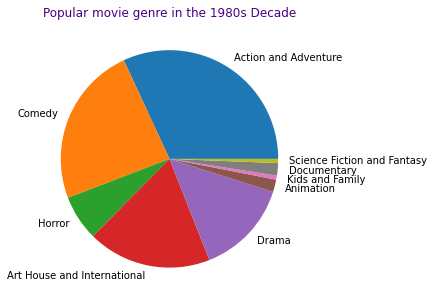

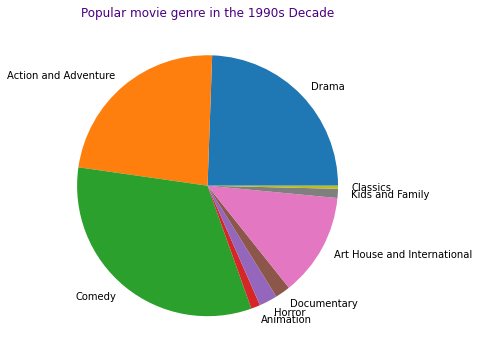

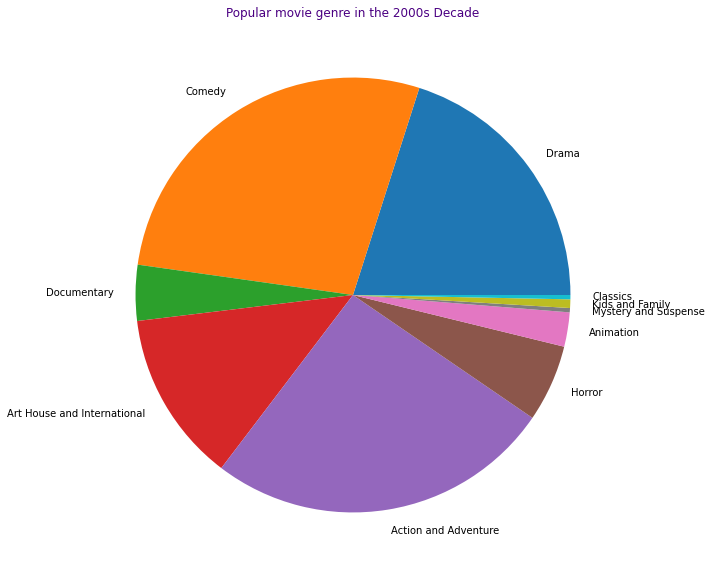

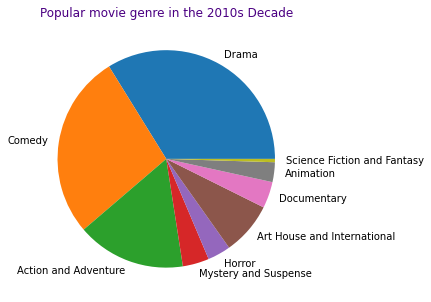

In [23]:
# To visualize the most popular genres we're ploting data from the last 4 decades (80s - 2010s)
# 80s Decade
_80_labels = _80sgenres.keys()
_80_values = _80sgenres.values()

plt.figure(figsize=(5,5))
plt.title('Popular movie genre in the 1980s Decade', color='indigo')

# Plotting
plt.pie(_80_values, labels = _80_labels)
plt.show()

# 90s Decade
_90_labels = _90sgenres.keys()
_90_values = _90sgenres.values()

plt.figure(figsize=(6,6))
plt.title('Popular movie genre in the 1990s Decade', color='indigo')

# Plotting
plt.pie(_90_values, labels = _90_labels)
plt.show()

# 2000 Decade
_2000_labels = _00sgenres.keys()
_2000_values = _00sgenres.values()

plt.figure(figsize=(10,10))
plt.title('Popular movie genre in the 2000s Decade', color='indigo')

# Plotting
plt.pie(_2000_values, labels = _2000_labels)
plt.show()

# 2010 Decade
_2010_labels = _2010sgenres.keys()
_2010_values = _2010sgenres.values()

plt.figure(figsize=(5,5))
plt.title('Popular movie genre in the 2010s Decade', color='indigo')

# Plotting
plt.pie(_2010_values, labels = _2010_labels)
plt.show()

In [24]:
print('_________________________________________________________\n')
print('Which are the most popular genres in the last decades?\n')
print('As we can see in the pie plots, Action and Adventure, Comedy and Drama are the most popular Gernres in the las Decades.')
print('We recomend filming this type of movies.')
print('_________________________________________________________\n')

_________________________________________________________

Which are the most popular genres in the last decades?

As we can see in the pie plots, Action and Adventure, Comedy and Drama are the most popular Gernres in the las Decades.
We recomend filming this type of movies.
_________________________________________________________



### What are the most popular themes per genre?

#### In order to find the most popular content we joined the synopsis per genre and cleand the vocabulary that is used. Finaly, we count the repetitions of each word and sort them to obtain the most popular "key words" to create our recomendations.

In [25]:
# Importing librarys for text cleaning
import re
import math
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fmartinezflores\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Cleaning synopsis
def clean_synopsis(word, stop_words):
    word = word.lower()
    words = re.findall('[a-záéíóúüñ]+', word)# Making sure synopsis words dont have a-záéíóúüñ 
    new_words = [w for w in words if ((not w in stop_words) and len(w)>=3 and len(w)<=24)] # Keeping only words ->
    return new_words                        #  different from stop words and also removing short or long words
                                            # this function returns the cleaned words from the synopsis
    
# Creating a vocabulary based on synopsis with matching Genre and Decade
def create_vocabulary(decade_genre_df):
    vocabulary = []    # Vocabulary joins all synopsis words with matching Genre and Decade 
    for synopsis in decade_genre_df :
        s = clean_synopsis(synopsis.strip(),s_w) # striping word from synopsis, this will clean a word at a time
        vocabulary.extend(s)

    return dict(collections.Counter(vocabulary)) # returns a dictionary like: key -> word, value -> repetitions of that word 

s_w = stopwords.words('english')
#stops = set(stopwords.words('english')) # Uncoment to print ount english stop words 
#print(stops)

# more words that we eant to ignore to refine our vocabulary
s_w.extend(['film','one','two','story','director','new','action','adventure','peter', 'john', 'back',
            'world','man', 'well','life', 'also', 'first','get','comedy','however', 'become', 'david','allen','jack'
           'true', 'award', 'academy','deckard','willie', 'even','celie', 'loretta', 'whose','lynn','james'])

In [27]:
# synopsis with matching Genre and Decade

# Action and Adventure
#_80s_action_Adventure
_80s_action_Adventure = _80sfilms.loc[_80sfilms['Genre 1'] == 'Action and Adventure',"Synopsis"]
_80s_acction_adventure_voc = create_vocabulary(_80s_action_Adventure) # Calling function to create vocabulary

#_90s_action_Adventure 
_90s_action_Adventure = _90sfilms.loc[_90sfilms['Genre 1'] == 'Action and Adventure',"Synopsis"]
_90s_acction_adventure_voc = create_vocabulary(_90s_action_Adventure)

#_00s_action_Adventure 
_00s_action_Adventure = _00sfilms.loc[_00sfilms['Genre 1'] == 'Action and Adventure',"Synopsis"]
_00s_acction_adventure_voc = create_vocabulary(_00s_action_Adventure)

#_00s_action_Adventure 
_2010s_action_Adventure = _2010sfilms.loc[_2010sfilms['Genre 1'] == 'Action and Adventure',"Synopsis"]
_2010s_acction_adventure_voc = create_vocabulary(_2010s_action_Adventure)

# ----------------------------------------------------------------------------------------------------------------
#_80s_Comedy
_80s_Comedy = _80sfilms.loc[_80sfilms['Genre 1'] == 'Comedy',"Synopsis"]
_80s_Comedy_voc = create_vocabulary(_80s_Comedy)

#_90s_Comedy 
_90s_Comedy = _90sfilms.loc[_90sfilms['Genre 1'] == 'Comedy',"Synopsis"]
_90s_Comedy_voc = create_vocabulary(_90s_Comedy)

#_00s_Comedy 
_00s_Comedy = _00sfilms.loc[_00sfilms['Genre 1'] == 'Comedy',"Synopsis"]
_00s_Comedy_voc = create_vocabulary(_00s_Comedy)

#_00s_Comedy 
_2010s_Comedy = _2010sfilms.loc[_2010sfilms['Genre 1'] == 'Comedy',"Synopsis"]
_2010s_Comedy_voc = create_vocabulary(_2010s_Comedy)

# ----------------------------------------------------------------------------------------------------------------
#_80s_Drama
_80s_Drama = _80sfilms.loc[_80sfilms['Genre 1'] == 'Drama',"Synopsis"]
_80s_Drama_voc = create_vocabulary(_80s_Drama)

#_90s_Drama 
_90s_Drama = _90sfilms.loc[_90sfilms['Genre 1'] == 'Drama',"Synopsis"]
_90s_Drama_voc = create_vocabulary(_90s_Drama)

#_00s_Drama
_00s_Drama = _00sfilms.loc[_00sfilms['Genre 1'] == 'Drama',"Synopsis"]
_00s_Drama_voc = create_vocabulary(_00s_Drama)

#_00s_Drama
_2010s_Drama = _2010sfilms.loc[_2010sfilms['Genre 1'] == 'Drama',"Synopsis"]
_2010s_Drama_voc = create_vocabulary(_2010s_Drama)

In [28]:
def most_popular_themes(vocabulary):
    _counter = 0
    popular_themes = []
    for word in sorted(vocabulary, key=vocabulary.get, reverse=True): # Sorting vocabulary dict in order to get the most 
        popular_themes.append(word)                                   # repeted words: "popular words"
        _counter += 1
        if _counter == 5: # Saving only the 5 most popular words in our vocabulary
            break
    
    return popular_themes

In [29]:
# Popular themes in Action Adventure movies
most_popular_80s_acction_adventure = most_popular_themes(_80s_acction_adventure_voc)
most_popular_90s_acction_adventure = most_popular_themes(_90s_acction_adventure_voc)
most_popular_00s_acction_adventure = most_popular_themes(_00s_acction_adventure_voc)
most_popular_2010s_acction_adventure = most_popular_themes(_2010s_acction_adventure_voc)

# Popular themes in Comedy movies
most_popular_80s_Comedy = most_popular_themes(_80s_Comedy_voc)
most_popular_90s_Comedy = most_popular_themes(_90s_Comedy_voc)
most_popular_00s_Comedy= most_popular_themes(_00s_Comedy_voc)
most_popular_2010s_Comedy = most_popular_themes(_2010s_Comedy_voc)

# Popular themes in Drama movies
most_popular_80s_Drama = most_popular_themes(_80s_Drama_voc)
most_popular_90s_Drama = most_popular_themes(_90s_Drama_voc)
most_popular_00s_Drama = most_popular_themes(_00s_Drama_voc)
most_popular_2010s_Drama = most_popular_themes(_2010s_Drama_voc)

# Printing results of the most popular words per genre
print('Most popular words in Acction Adventure Vocabulary')
print(most_popular_80s_acction_adventure)
print(most_popular_90s_acction_adventure)
print(most_popular_00s_acction_adventure)
print(most_popular_2010s_acction_adventure)
print('_______________________________________________')

print('Most popular words in Comedy Vocabulary')
print(most_popular_80s_Comedy)
print(most_popular_90s_Comedy)
print(most_popular_00s_Comedy)
print(most_popular_2010s_Comedy)
print('_______________________________________________')

print('Most popular words in Drama Vocabulary')
print(most_popular_80s_Drama)
print(most_popular_90s_Drama)
print(most_popular_00s_Drama)
print(most_popular_2010s_Drama)
print('_______________________________________________')


Most popular words in Acction Adventure Vocabulary
['time', 'stars', 'police', 'superman', 'three']
['wife', 'family', 'cop', 'time', 'war']
['way', 'star', 'young', 'city', 'thriller']
['together', 'way', 'help', 'former', 'team']
_______________________________________________
Most popular words in Comedy Vocabulary
['town', 'begins', 'young', 'friend', 'pfeiffer']
['young', 'school', 'like', 'makes', 'tom']
['family', 'love', 'begins', 'day', 'soon']
['jack', 'family', 'time', 'friends', 'way']
_______________________________________________
Most popular words in Drama Vocabulary
['years', 'young', 'husband', 'woman', 'mother']
['family', 'drama', 'time', 'young', 'begins']
['team', 'young', 'coach', 'star', 'family']
['love', 'family', 'true', 'based', 'years']
_______________________________________________


### Our recomendations

In [30]:
"""
Based on the insights founded in the Analysis on the data provided, we establish that the best opctions for filming 
1)  Category: Acction/Adventure. 
    Theme: cops with superpowers fighting a civil war in a big city.

2)  Category: Comedy 
    Theme: New kid arrives to high shcool, finds new love and seeks to please his friends. 

2)  Category: Drama
    Theme: Thue based story of a young family. 
"""

'\nBased on the insights founded in the Analysis on the data provided, we establish that the best opctions for filming \n1)  Category: Acction/Adventure. \n    Theme: cops with superpowers fighting a civil war in a big city.\n\n2)  Category: Comedy \n    Theme: New kid arrives to high shcool, finds new love and seeks to please his friends. \n\n2)  Category: Drama\n    Theme: Thue based story of a young family. \n'

## Enrique

In [ ]:
# Your code here - remember to use markdown cells for comments as well!

## John

In [1]:
## Data Clean Up
# import all necessary packages
import csv
import pandas as pd
import numpy as np

# Opening + Reading the Movie_Gross CSV file
tmdb_movie_gross = pd.read_csv('DataBases/bom.movie_gross.csv', encoding = 'utf-8')

# Remove duplicate records
tmdb_movie_gross = tmdb_movie_gross.drop_duplicates()

# Replace NaN / null values to a "0" because we're reviewing gross/money. no value = no money generated in domestic gross
## Standardize domestic_gross into an int
tmdb_movie_gross['domestic_gross'] = tmdb_movie_gross['domestic_gross'].fillna(0)
tmdb_movie_gross['domestic_gross'] = tmdb_movie_gross['domestic_gross'].astype(int)

# Standardize foreign_gross into a float because you cannot turn decimals into an int
## Inorder to change values into a float, you must get rid of the commas
### Replace NaN / null values to a "0" because we're reviewing gross/money. no value = no money generated in foreign_gross
tmdb_movie_gross['foreign_gross'] = tmdb_movie_gross['foreign_gross'].replace(",", "", regex=True)
tmdb_movie_gross['foreign_gross'] = tmdb_movie_gross['foreign_gross'].astype(float)
tmdb_movie_gross['foreign_gross'] = tmdb_movie_gross['foreign_gross'].fillna(0)

# Because there were 5 entries that were null in Studio, we change the null value to a string that says "N/A" which just means that we don't know the studio that produced the film
tmdb_movie_gross['studio'] = tmdb_movie_gross['studio'].fillna('N/A')

#Display Movie_Gross Data
tmdb_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000.0,2010
3,Inception,WB,292600000,535700000.0,2010
4,Shrek Forever After,P/DW,238700000,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200,0.0,2018
3383,Edward II (2018 re-release),FM,4800,0.0,2018
3384,El Pacto,Sony,2500,0.0,2018
3385,The Swan,Synergetic,2400,0.0,2018


In [2]:
#display info, type, and # of values in each column
tmdb_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   int32  
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 145.5+ KB


In [3]:
#test to see if all columns have the same ammount of values
tmdb_movie_gross.duplicated().value_counts() 

False    3387
dtype: int64

In [4]:
#test to see if there are NaN values
tmdb_movie_gross.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [5]:
"Peer Programing/Assisting with Elliot's Branch for Data Viz"

"Peer Programing/Assisting with Elliot's Branch for Data Viz"

In [6]:
## Coppied Over for Review

#import needed libraries
import pandas as pd

#read tmdb file, make sure values are in the same format, and drop null values
tmdb_movie_db = pd.read_csv('databases/tmdb.movies.csv', na_filter=True, na_values='[]', encoding = 'utf-8', index_col = 0)
tmdb_movie_db.dropna()
#drop extra title column
tmdb_movie_db = tmdb_movie_db.drop('original_title', axis = 1)
#standardize release date into date format
tmdb_movie_db['release_date'] = pd.to_datetime(tmdb_movie_db['release_date'])
#strip whitespace from title
tmdb_movie_db['title'] = tmdb_movie_db['title'].str.strip()
#remove duplicates
tmdb_movie_db = tmdb_movie_db.drop_duplicates()
#convert genre_ids to name
#df.where()

tmdb_movie_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,0.600,2018-06-22,Trailer Made,0.0,1


In [7]:
## Coppied Over for Review

#read tn file, make sure values are in the same format, and drop null values
tn_movie_db = pd.read_csv('databases/tn.movie_budgets.csv', na_filter=True, na_values='[]', encoding = 'utf-8', index_col = 0)
tn_movie_db.dropna()
#standardize release date into date format
tn_movie_db['release_date'] = pd.to_datetime(tn_movie_db['release_date'])
#strip whitespace from title
tn_movie_db['movie'] = tn_movie_db['movie'].str.strip()
#strip $
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].str.strip('$')
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].str.strip('$')
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].str.strip('$')
#remove ,
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].replace(",", "", regex=True)
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].replace(",", "", regex=True)
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].replace(",", "", regex=True)
#convert to integers
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].astype(int)
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].astype(int)
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].astype(float)
#create metric ratios
tn_movie_db['dom_gross / budget'] = tn_movie_db['domestic_gross'] / tn_movie_db['production_budget']
tn_movie_db['ww_gross / budget'] = tn_movie_db['worldwide_gross'] / tn_movie_db['production_budget']
tn_movie_db['dom_profit'] = tn_movie_db['domestic_gross'] - tn_movie_db['production_budget']
tn_movie_db['profit'] = tn_movie_db['worldwide_gross'] - tn_movie_db['production_budget']

tn_movie_db

,release_date,movie,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
id,,,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2.776345e+09,1.789430,6.532577,335507625,2.351345e+09
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,0.587101,2.546673,-169536125,6.350639e+08
3,2019-06-07,Dark Phoenix,350000000,42762350,1.497624e+08,0.122178,0.427892,-307237650,-2.002376e+08
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1.403014e+09,1.388403,4.243841,128405868,1.072414e+09
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,1.956408,4.153696,303181382,9.997217e+08
...,...,...,...,...,...,...,...,...,...
78,2018-12-31,Red 11,7000,0,0.000000e+00,0.000000,0.000000,-7000,-7.000000e+03
79,1999-04-02,Following,6000,48482,2.404950e+05,8.080333,40.082500,42482,2.344950e+05
80,2005-07-13,Return to the Land of Wonders,5000,1338,1.338000e+03,0.267600,0.267600,-3662,-3.662000e+03


In [9]:
## Coppied Over for Review 

#merge title and movie name
tn_movie_db = tn_movie_db.rename(columns = {"movie":"title"})

#special cases where movie titles do not match
tn_movie_db['title'].replace({'Harry Potter and the Deathly Hallows: Part I' : 'Harry Potter and the Deathly Hallows: Part 1'}, inplace=True)
tn_movie_db['title'].replace({'Harry Potter and the Deathly Hallows: Part II' : 'Harry Potter and the Deathly Hallows: Part 2'}, inplace=True)
tmdb_movie_db['title'].replace({'Fast & Furious 6':'Fast and Furious 6'}, inplace=True)
tn_movie_db['title'].replace({'Star Wars: The Force Awakens' : 'Star Wars Ep. VII: The Force Awakens'}, inplace=True)
tn_movie_db['title'].replace({'Star Wars: The Last Jedi' : 'Star Wars Ep. VIII: The Last Jedi'}, inplace=True)

#merge databases
movie_db = tmdb_movie_db.merge(tn_movie_db, how = 'left')


#drop null values
movie_db = movie_db.dropna()

movie_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,125000000.0,296131568.0,960431568.0,2.369053,7.683453,171131568.0,835431568.0
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,165000000.0,217581232.0,494870992.0,1.318674,2.999218,52581232.0,329870992.0
2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,170000000.0,312433331.0,621156389.0,1.837843,3.653861,142433331.0,451156389.0
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174,30000000.0,191796233.0,364545516.0,6.393208,12.151517,161796233.0,334545516.0
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186,160000000.0,292576195.0,835524642.0,1.828601,5.222029,132576195.0,675524642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23711,"[53, 18, 27]",510284,en,5.972,2019-02-01,Braid,6.4,18,1660000.0,0.0,80745.0,0.000000,0.048642,-1660000.0,-1579255.0
23747,"[18, 10752]",514407,en,5.599,2018-10-26,Indivisible,5.4,13,2700000.0,3511417.0,3588305.0,1.300525,1.329002,811417.0,888305.0
23795,"[18, 28, 80]",547590,en,5.274,2019-05-03,El Chicano,9.0,1,8000000.0,700261.0,700261.0,0.087533,0.087533,-7299739.0,-7299739.0
23907,"[18, 35, 28, 80]",506971,ur,4.486,2018-07-20,Teefa in Trouble,7.6,11,1500000.0,0.0,98806.0,0.000000,0.065871,-1500000.0,-1401194.0


In [19]:
# check to make sure that there are no values with 0
## new_movie_db.loc[movie_db['worldwide_gross'] < 1]
## sorted(new_movie_db['worldwide_gross'].value_counts().index.to_list())

In [11]:
new_movie_db = movie_db.drop(movie_db[movie_db['domestic_gross'] < 1].index)
new_movie_db

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,125000000.0,296131568.0,960431568.0,2.369053,7.683453,171131568.0,835431568.0
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,165000000.0,217581232.0,494870992.0,1.318674,2.999218,52581232.0,329870992.0
2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368,170000000.0,312433331.0,621156389.0,1.837843,3.653861,142433331.0,451156389.0
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174,30000000.0,191796233.0,364545516.0,6.393208,12.151517,161796233.0,334545516.0
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186,160000000.0,292576195.0,835524642.0,1.828601,5.222029,132576195.0,675524642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23582,"[28, 16, 14, 12, 35, 878]",503314,ja,6.868,2019-01-16,Dragon Ball Super: Broly,7.4,721,8500000.0,30376755.0,122747755.0,3.573736,14.440912,21876755.0,114247755.0
23687,"[16, 12, 10751, 36, 10752]",433694,en,6.107,2018-04-13,Sgt. Stubby: An American Hero,6.4,9,25000000.0,3054285.0,3645957.0,0.122171,0.145838,-21945715.0,-21354043.0
23747,"[18, 10752]",514407,en,5.599,2018-10-26,Indivisible,5.4,13,2700000.0,3511417.0,3588305.0,1.300525,1.329002,811417.0,888305.0
23795,"[18, 28, 80]",547590,en,5.274,2019-05-03,El Chicano,9.0,1,8000000.0,700261.0,700261.0,0.087533,0.087533,-7299739.0,-7299739.0


In [12]:
# Import matplotlib
import matplotlib.pyplot as plt

# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline

In [13]:
#check + count all values
movie_db['genre_ids'].value_counts()

[18]                             94
[35]                             75
[35, 18]                         39
[18, 10749]                      33
[27, 53]                         26
                                 ..
[14, 27, 28]                      1
[28, 12, 16, 35, 10751, 14]       1
[28, 12, 18, 9648, 10749, 14]     1
[53, 80, 28, 35]                  1
[28, 12, 16]                      1
Name: genre_ids, Length: 493, dtype: int64

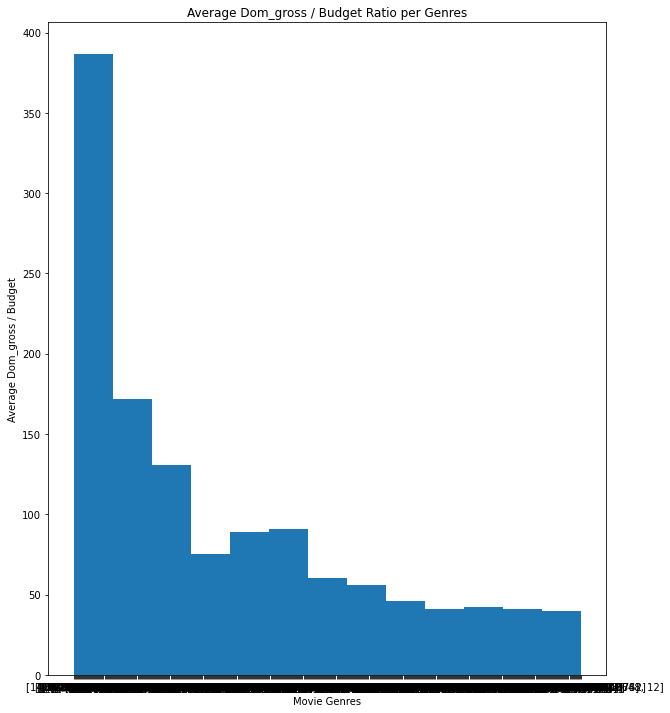

In [14]:
# Plot Bar Chat
## Genre's X Axis is conjested

fig, ax = plt.subplots(figsize=(10, 12))

#ax.hist(movie_db['dom_gross / budget'].mean(), 10, tick_label = movie_db['genre_ids'])
ax.hist(movie_db['genre_ids'], bins='auto')

ax.set_title('Average Dom_gross / Budget Ratio per Genres')
ax.set_ylabel('Average Dom_gross / Budget')
ax.set_xlabel('Movie Genres');



#x = movie_db['genre_ids']

#y = movie_db['dom_gross / budget'].mean()

#plt.hist(x, bins = 1000, edgecolor='black', color='#00C8AD')
#plt.xlabel('Movie Genres')
#plt.ylabel('Average Dom_gross / Budget')
#plt.title('Average Dom_gross / Budget Ratio per Genres')
#plt.show()

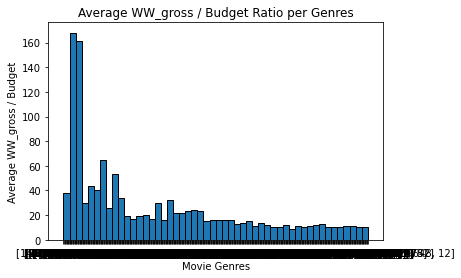

In [16]:

x = movie_db['genre_ids']

y = movie_db['ww_gross / budget'].mean()

plt.hist(x, bins = 50, edgecolor='black')
plt.xlabel('Movie Genres')
plt.ylabel('Average WW_gross / Budget')
plt.title('Average WW_gross / Budget Ratio per Genres')
plt.show()





In [16]:
'profit per genre'

### Coppied Over for Peer Review

## fig, ax = plt.subplots(figsize=(10, 12))
## ax.hist(movie_db['dom_gross / budget'].mean(), 10, tick_label = movie_db['genre_ids'])
## ax.hist(movie_db['genre_ids'], bins='auto')

#ax.set_title('Profit by Genre')
#ax.set_ylabel('Movie Profit')
#x.set_xlabel('Movie Genres');

# 'profit per genre'

#df_mr1.value_counts('genres').nlargest(12)

#for z test
#df_mr1.describe()

##ztest ,propability_value = stests.ztest(dataframe['movie_db'], x2=None, value=146)
##print(float(propability_value))
##if propability_value<0.05:
##print("Null hyphothesis rejected , Alternative hyphothesis accepted")
##else:
##print("Null hyphothesis accepted , Alternative hyphothesis rejected")



'profit per genre'

In [ ]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(pop_standardized_rating, bins=45, density=True, color='b', alpha = 0.5)
sns.kdeplot(pop_standardized_rating, ax=ax, color='y')

plt.hist(samp_standardized_rating, bins=11, density=True, color='r', alpha = 0.5)
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

plt.vlines(x=z_mean, ymin=0, ymax=0.7, color='m', label='x<=40 Mean: 0.7702')
plt.vlines(x=pop_z_mean, ymin=0, ymax=0.7, label='Population Mean: 0.0')
                                              
plt.xlabel('Z Scores')
plt.title('Less than 40 Minutes to All Films - Ratings')
plt.legend()

### Correlation

### Ho:
##### - There is no correlation between runtime and average rating for movies that are less than 40 minutes. 

### Ha:
##### - There is a statistically significant correlation between runtime and average rating at the 95% level for movies that are less than 40 minutes. 

In [ ]:
# r-critical value to test if found r is statistically signifcant
critical_r = 0.2510
# Source: https://www.calculators.tech/t-value-calculator
# (Unable to calculate by hand as I have been unable to find a direct formula to find this - must use either r-critical table or a r-crit calculator like the above source)
df = df_up40['Runtime'].count() - 2 # getting degrees of freedom to determine r-critical
df

In [ ]:
# calculating correlation

x = df_up40['Runtime']
y = df_up40['AverageRating']

r = x.corr(y) # result is the pearson correlation coefficient
r

print(f'Pearson Correlation: {r} | r-critical: {critical_r} | Is r greater? {abs(r) >= critical_r}')
if abs(r) >= critical_r:
    print("Reject the null")
elif abs(r) < critical_r:
    print("Fail to reject null")

In [ ]:
sns.lmplot(x="Runtime", y="AverageRating", data=df_up40, line_kws={'color': 'red'}, height=8, aspect=1.5);

### 40 to 60 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the average rating of a movie that has a runtime of between 40 minutes and 60 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the average rating of a movie that has a runtime of between 40 minutes and 60 minutes and other movies in the population.

In [ ]:
# runtime sample 2 - long-form short films (40.0001 minutes to 60 minutes)
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes AS Runtime
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) BETWEEN 40.0001 AND 60
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
ORDER BY
    mb.runtime_minutes DESC
;"""
df_4060 = pd.read_sql(q, conn)
df_4060

In [ ]:
# z-test - 40 to 60 minutes ratings run

a = 0.025

# two-tailed z-test

x_bar = df_4060['AverageRating'].mean()
n = df_4060['AverageRating'].count()
std = df_allrt['AverageRating'].std()
mu = df_allrt['AverageRating'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

In [ ]:
# normalizing distribution with for loop
samp_standardized_rating = [(x-mu)/std for x in df_4060['AverageRating']]
z_mean = np.mean(samp_standardized_rating)
print(f' Standardized Sample Mean: {z_mean}')

In [ ]:
# visualizing above distribution as histogram
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(samp_standardized_rating, bins=15, density=True, color='r')
ax.set_xlabel('Z Scores')
ax.set_title('40 to 60 Minutes - Ratings')

# applying normalized curve over histogram
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

# marking standardized_mean
ax.vlines(x=z_mean, ymin=0, ymax=0.7, color='b', label='Mean: 0.6132')
ax.legend()

In [ ]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(pop_standardized_rating, bins=45, density=True, color='b', alpha = 0.5)
sns.kdeplot(pop_standardized_rating, ax=ax, color='y')

plt.hist(samp_standardized_rating, bins=15, density=True, color='r', alpha = 0.5)
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

plt.vlines(x=z_mean, ymin=0, ymax=0.7, color='m', label='40 < x <= 60 Mean: 0.6132')
plt.vlines(x=pop_z_mean, ymin=0, ymax=0.7, label='Population Mean: 0.0')
                                              
plt.xlabel('Z Scores')
plt.title('40 to 60 Minutes to All Films - Ratings')
plt.legend()

### Correlation

### Ho:
##### - There is no correlation between runtime and average rating for movies that are between 40 and 60 minutes. 

### Ha:
##### - There is a statistically significant correlation between runtime and average rating at the 95% level for movies that are between 40 and 60 minutes. 

In [ ]:
# r-critical value to test if found r is statistically signifcant
critical_r = 0.0529
# Source: https://www.calculators.tech/t-value-calculator
# (Unable to calculate by hand as I have been unable to find a direct formula to find this - must use either r-critical table or a r-crit calculator like the above source)
df = df_4060['Runtime'].count() - 2 # getting degrees of freedom to determine r-critical
df

In [ ]:
# calculating correlation

x = df_4060['Runtime']
y = df_4060['AverageRating']

r = x.corr(y) # result is the pearson correlation coefficient
r

print(f'Pearson Correlation: {r} | r-critical: {critical_r} | Is r greater? {abs(r) >= critical_r}')
if abs(r) >= critical_r:
    print("Reject the null")
elif abs(r) < critical_r:
    print("Fail to reject null")

In [ ]:
sns.lmplot(x="Runtime", y="AverageRating", data=df_4060, line_kws={'color': 'red'}, height=8, aspect=1.5);

### 60 to 90 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the average rating of a movie that has a runtime of between 60 minutes and 90 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the average rating of a movie that has a runtime of between 60 minutes and 90 minutes and other movies in the population.

In [ ]:
# runtime sample 3 - short-mid length films (60.0001 minutes to 90 minutes)
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes AS Runtime
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) BETWEEN 60.0001 AND 90
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
ORDER BY
    mb.runtime_minutes DESC
;"""
df_6090 = pd.read_sql(q, conn)
df_6090

In [ ]:
# z-test - 60 to 90 minutes ratings run

a = 0.025

# two-tailed z-test

x_bar = df_6090['AverageRating'].mean()
n = df_6090['AverageRating'].count()
std = df_allrt['AverageRating'].std()
mu = df_allrt['AverageRating'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

In [ ]:
# normalizing distribution with for loop
samp_standardized_rating = [(x-mu)/std for x in df_6090['AverageRating']]
z_mean = np.mean(samp_standardized_rating)
print(f' Standardized Sample Mean: {z_mean}')

In [ ]:
# visualizing above distribution as histogram
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(samp_standardized_rating, bins=22, density=True, color='r')
ax.set_xlabel('Z Scores')
ax.set_title('60 to 90 Minutes - Ratings')

# applying normalized curve over histogram
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

# marking standardized_mean
ax.vlines(x=z_mean, ymin=0, ymax=0.7, color='b', label='Mean: -0.1648')
ax.legend()

In [ ]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(pop_standardized_rating, bins=45, density=True, color='b', alpha = 0.5)
sns.kdeplot(pop_standardized_rating, ax=ax, color='y')

plt.hist(samp_standardized_rating, bins=22, density=True, color='r', alpha = 0.5)
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

plt.vlines(x=z_mean, ymin=0, ymax=0.7, color='m', label='60 < x <= 90 Mean: -0.1648')
plt.vlines(x=pop_z_mean, ymin=0, ymax=0.7, label='Population Mean: 0.0')
                                              
plt.xlabel('Z Scores')
plt.title('60 to 90 Minutes to All Films - Ratings')
plt.legend()

### Correlation

### Ho:
##### - There is no correlation between runtime and average rating for movies that are between 60 and 90 minutes. 

### Ha:
##### - There is a statistically significant correlation between runtime and average rating at the 95% level for movies that are between 60 and 90 minutes. 

In [ ]:
# r-critical value to test if found r is statistically signifcant
critical_r = 0.0132
# Source: https://www.calculators.tech/t-value-calculator
# (Unable to calculate by hand as I have been unable to find a direct formula to find this - must use either r-critical table or a r-crit calculator like the above source)
df = df_6090['Runtime'].count() - 2 # getting degrees of freedom to determine r-critical
df

In [ ]:
# calculating correlation

x = df_6090['Runtime']
y = df_6090['AverageRating']

r = x.corr(y) # result is the pearson correlation coefficient
r

print(f'Pearson Correlation: {r} | r-critical: {critical_r} | Is r greater? {abs(r) >= critical_r}')
if abs(r) >= critical_r:
    print("Reject the null")
elif abs(r) < critical_r:
    print("Fail to reject null")

In [ ]:
sns.lmplot(x="Runtime", y="AverageRating", data=df_6090, line_kws={'color': 'red'}, height=8, aspect=1.5);

### 90 to 120 Minutes Testing

### Z-Test

### Ho
##### - There is no difference between the average rating of a movie that has a runtime of between 90 minutes and 120 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the average rating of a movie that has a runtime of between 90 minutes and 120 minutes and other movies in the population.

In [ ]:
# runtime sample 4 - relative average length films (90.0001 minutes to 120 minutes)
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes AS Runtime
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) BETWEEN 90.0001 AND 120
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
ORDER BY
    mb.runtime_minutes DESC
;"""
df_90120 = pd.read_sql(q, conn)
df_90120

In [ ]:
# z-test - 90 to 120 minutes ratings run

a = 0.025

# two-tailed z-test

x_bar = df_90120['AverageRating'].mean()
n = df_90120['AverageRating'].count()
std = df_allrt['AverageRating'].std()
mu = df_allrt['AverageRating'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

In [ ]:
# normalizing distribution with for loop
samp_standardized_rating = [(x-mu)/std for x in df_90120['AverageRating']]
z_mean = np.mean(samp_standardized_rating)
print(f' Standardized Sample Mean: {z_mean}')

In [ ]:
# visualizing above distribution as histogram
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(samp_standardized_rating, bins=24, density=True, color='r')
ax.set_xlabel('Z Scores')
ax.set_title('90 to 120 minutes - Ratings')

# applying normalized curve over histogram
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

# marking standardized_mean
ax.vlines(x=z_mean, ymin=0, ymax=0.7, color='b', label='Mean: 0.0270')
ax.legend()

In [ ]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(pop_standardized_rating, bins=45, density=True, color='b', alpha = 0.5)
sns.kdeplot(pop_standardized_rating, ax=ax, color='y')

plt.hist(samp_standardized_rating, bins=24, density=True, color='r', alpha = 0.5)
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

plt.vlines(x=z_mean, ymin=0, ymax=0.7, color='m', label='90 < x <= 120 Mean: 0.0270')
plt.vlines(x=pop_z_mean, ymin=0, ymax=0.7, label='Population Mean: 0.0')
                                              
plt.xlabel('Z Scores')
plt.title('90 to 120 minutes to All Films - Ratings')
plt.legend()

### Correlation

### Ho:
##### - There is no correlation between runtime and average rating for movies that are between 90 and 120 minutes. 

### Ha:
##### - There is a statistically significant correlation between runtime and average rating at the 95% level for movies that are between 90 and 120 minutes. 

In [ ]:
# r-critical value to test if found r is statistically signifcant
critical_r = 0.0118
# Source: https://www.calculators.tech/t-value-calculator
# (Unable to calculate by hand as I have been unable to find a direct formula to find this - must use either r-critical table or a r-crit calculator like the above source)
df = df_90120['Runtime'].count() - 2 # getting degrees of freedom to determine r-critical
df

In [ ]:
# calculating correlation

x = df_90120['Runtime']
y = df_90120['AverageRating']

r = x.corr(y) # result is the pearson correlation coefficient
r

print(f'Pearson Correlation: {r} | r-critical: {critical_r} | Is r greater? {abs(r) >= critical_r}')
if abs(r) >= critical_r:
    print("Reject the null")
elif abs(r) < critical_r:
    print("Fail to reject null")

In [ ]:
sns.lmplot(x="Runtime", y="AverageRating", data=df_90120, line_kws={'color': 'red'}, height=8, aspect=1.5);

### 120 Minutes and Up Testing

### Z-Test

### Ho
##### - There is no difference between the average rating of a movie that has a runtime of 120 minutes or greater and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the average rating of a movie that has a runtime of 120 minutes or greater and other movies in the population at the 95% level.

In [ ]:
# runtime sample 5 - long length films (120.0001 minutes and up films)
q = """
SELECT
    mb.movie_id
    ,mb.primary_title AS title
    ,mb.runtime_minutes AS Runtime
    ,mb.genres
    ,mr.averagerating AS AverageRating
    ,mr.numvotes AS Num_Votes
FROM
    movie_basics AS mb
    JOIN movie_ratings AS mr
        USING(movie_id)
WHERE
    CAST(Num_Votes AS int) > 30
    AND CAST(mb.runtime_minutes as float) BETWEEN 120.0001 AND 210
    AND mb.runtime_minutes IS NOT NULL
    AND mb.genres IS NOT NULL
ORDER BY
    mb.runtime_minutes DESC
;"""
df_120up = pd.read_sql(q, conn)
df_120up

In [ ]:
# z-test - 120 minutes and up ratings run

a = 0.025

# two-tailed z-test

x_bar = df_120up['AverageRating'].mean()
n = df_120up['AverageRating'].count()
std = df_allrt['AverageRating'].std()
mu = df_allrt['AverageRating'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

In [ ]:
# normalizing distribution with for loop
samp_standardized_rating = [(x-mu)/std for x in df_120up['AverageRating']]
z_mean = np.mean(samp_standardized_rating)
print(f' Standardized Sample Mean: {z_mean}')

In [ ]:
# visualizing above distribution as histogram
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(samp_standardized_rating, bins=15, density=True, color='r')
ax.set_xlabel('Z Scores')
ax.set_title('120 Minutes and Up - Ratings')

# applying normalized curve over histogram
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

# marking standardized_mean
ax.vlines(x=z_mean, ymin=0, ymax=0.7, color='b', label='Mean: 0.2899')
ax.legend()

In [ ]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(pop_standardized_rating, bins=45, density=True, color='b', alpha = 0.5)
sns.kdeplot(pop_standardized_rating, ax=ax, color='y')

plt.hist(samp_standardized_rating, bins=15, density=True, color='r', alpha = 0.5)
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

plt.vlines(x=z_mean, ymin=0, ymax=0.7, color='m', label='120 < x Mean: 0.2899')
plt.vlines(x=pop_z_mean, ymin=0, ymax=0.7, label='Population Mean: 0.0')
                                              
plt.xlabel('Z Scores')
plt.title('120 Minutes and Up to All Films - Ratings')
plt.legend()

### Correlation:

##### Ho:
##### - There is no correlation between runtime and average rating for movies that are 120 minutes or longer. 

##### Ha:
##### - There is a statistically significant correlation between runtime and average rating at the 95% level for movies that are 120 minutes or longer. 

In [ ]:
# r-critical value to test if found r is statistically signifcant
critical_r = 0.0235
# Source: https://www.calculators.tech/t-value-calculator
# (Unable to calculate by hand as I have been unable to find a direct formula to find this - must use either r-critical table or a r-crit calculator like the above source)
df = df_120up['Runtime'].count() - 2 # getting degrees of freedom to determine r-critical
df

In [ ]:
# calculating correlation

x = df_120up['Runtime']
y = df_120up['AverageRating']

r = x.corr(y) # result is the pearson correlation coefficient
r

print(f'Pearson Correlation: {r} | r-critical: {critical_r} | Is r greater? {abs(r) >= critical_r}')
if abs(r) >= critical_r:
    print("Reject the null")
elif abs(r) < critical_r:
    print("Fail to reject null")

In [ ]:
# plotting the regression showing the line of best fit with slope of r
sns.lmplot(x="Runtime", y="AverageRating", data=df_120up, line_kws={'color': 'red'}, height=8, aspect=1.5);

## Conclusions from Runtime Sample Testing for Average Ratings

Z-Tests:
- For films that are less than 40 minute runtimes, we can reject the null hypothesis with a statistically significant p-value of 0.0000001193, meaning that in 95% of cases we can expect our average ratings to be higher because of this set of runtimes.
    ##### - Reject the Null
- For films that have between 40 and 60 minute runtimes, we can reject the null hypothesis with a statistically significant p-value of 0.0, meaning that in 95% of cases we can expect our average ratings to be higher because of this set of runtimes.
    ##### - Reject the Null
- For films that have between 60 and 90 minute runtimes, we can reject the null hypothesis with a statistically significant p-value of 0.0, meaning that in 95% of cases we can expect our average ratings to be lower because of this set of runtimes.
    ##### - Reject the Null
- For films that have between 90 and 120 minute runtimes, we can reject the null hypothesis with a statistically significant p-value of 0.00008571, meaning that in 95% of cases we can expect our average ratings to be higher because of this set of runtimes.
    ##### - Reject the Null
- For films that have either 120 minute runtimes or longer, we can reject the null hypothesis with a statistically significant p-value of 0.0, meaning that in 95% of cases we can expect our average ratings to be higher because of this set of runtimes.
    ##### - Reject the Null

Correlation:
- In 95% of cases, movies that 90 minutes or longer have a weak positive correlation between their runtime and their ratings. 
- In 95% of cases, movies that last between 60 and 90 minutes have a weak negative correlation between their runtime and ratings.
- For movies that are less than 60 minutes long, we cannot conclude that there is a statistically significant correlation either.

For all films less than 3.5 hours long (where we cut off movie runtimes that client would be unlikely to want to pursue), there is a statistically significant weak positive correlation between runtime and average rating of a film in 95% of cases.

### Merging Data from SQL IMdb and Box Office Records (Elliot's Effort)

### Domestic Revenue per Rating Table 
- Merging on title

In [ ]:
# merging dr_movie_db with the sql database data
domgross_im_db = dr_movie_db.merge(df_allrt,how='inner',on='title')
domgross_im_db

In [ ]:
# checking for unintentionally duplicated values
domgross_im_db.duplicated('title').value_counts() 

In [ ]:
# dropping found unintentionally duplicated values
domgross_im_db = domgross_im_db.drop_duplicates(subset='title')
domgross_im_db

### Hypothesis for Runtime and Domestic Gross Revenue

In [ ]:
# standardizing population for secondary visualizations to follow
mu = domgross_im_db['domestic_gross'].mean()
std = domgross_im_db['domestic_gross'].std()

pop_standardized_rating = [(x-mu)/std for x in domgross_im_db['domestic_gross']]
pop_z_mean = np.mean(pop_standardized_rating)
pop_z_mean

### Up to 40 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the domestic revenue of a movie that has a runtime of 40 minutes or less and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the domestic revenue of a movie that has a runtime of between 40 minutes or less minutes and other movies in the population.

In [ ]:
# pulling sample based on runtime from combined data
domgross_40_db = domgross_im_db.loc[domgross_im_db['Runtime'] <= 40]
domgross_40_db

##### Unable to perform z-test for this as there are no rows in sample for this range.

### 40 to 60 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the domestic revenue of a movie that has a runtime of between 40 minutes and 60 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the domestic revenue of a movie that has a runtime of between 40 minutes and 60 minutes and other movies in the population.

In [ ]:
# pulling sample based on runtime from combined data
domgross_4060_db = domgross_im_db.loc[(domgross_im_db['Runtime'] > 40) & (domgross_im_db['Runtime'] <= 60)]
domgross_4060_db

##### Unable to perform z-test for this as there are no rows in sample for this range.

### 60 to 90 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the domestic revenue of a movie that has a runtime of between 60 minutes and 90 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the domestic revenue of a movie that has a runtime of between 60 minutes and 90 minutes and other movies in the population.

In [ ]:
# pulling sample based on runtime from combined data
domgross_6090_db = domgross_im_db.loc[(domgross_im_db['Runtime'] > 60) & (domgross_im_db['Runtime'] <= 90)]
domgross_6090_db

In [ ]:
# z-test - 60 minutes to 90 minutes domestic revenue run

a = 0.025

# two-tailed z-test
x_bar = domgross_6090_db['domestic_gross'].mean()
n = domgross_6090_db['domestic_gross'].count()
std = domgross_im_db['domestic_gross'].std()
mu = domgross_im_db['domestic_gross'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

In [ ]:
# normalizing distribution with for loop
samp_standardized_rating = [(x-mu)/std for x in domgross_6090_db['domestic_gross']]
z_mean = np.mean(samp_standardized_rating)
print(f' Standardized Sample Mean: {z_mean}')

In [ ]:
# visualizing above distribution as histogram
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(samp_standardized_rating, bins=11, density=True, color='r')
ax.set_xlabel('Z Scores')
ax.set_title('60 to 90 Minutes - DM Revenue')

# applying normalized curve over histogram
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

# marking standardized_mean
ax.vlines(x=z_mean, ymin=0, ymax=0.7, color='b', label='Mean: -0.2567')
ax.legend()

In [ ]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(pop_standardized_rating, bins=16, density=True, color='b', alpha = 0.5)
sns.kdeplot(pop_standardized_rating, ax=ax, color='y')

plt.hist(samp_standardized_rating, bins=11, density=True, color='r', alpha = 0.5)
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

plt.vlines(x=z_mean, ymin=0, ymax=0.7, color='m', label='60 < x <= 90 Mean: -0.2567')
plt.vlines(x=pop_z_mean, ymin=0, ymax=0.7, label='Population Mean: 0.0')
                                              
plt.xlabel('Z Scores')
plt.title('60 to 90 Minutes to All Films - DM Revenue')
plt.legend()

### 90 to 120 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the domestic revenue of a movie that has a runtime of between 90 minutes and 120 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the domestic revenue of a movie that has a runtime of between 90 minutes and 120 minutes and other movies in the population.

In [ ]:
# pulling sample based on runtime from combined data
domgross_90120_db = domgross_im_db.loc[(domgross_im_db['Runtime'] > 90) & (domgross_im_db['Runtime'] <= 120)]
domgross_90120_db

In [ ]:
# z-test - 90 minutes to 120 minutes domestic revenue run

a = 0.025

# two-tailed z-test
x_bar = domgross_90120_db['domestic_gross'].mean()
n = domgross_90120_db['domestic_gross'].count()
std = domgross_im_db['domestic_gross'].std()
mu = domgross_im_db['domestic_gross'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

In [ ]:
# normalizing distribution with for loop
samp_standardized_rating = [(x-mu)/std for x in domgross_90120_db['domestic_gross']]
z_mean = np.mean(samp_standardized_rating)
print(f' Standardized Sample Mean: {z_mean}')

In [ ]:
# visualizing above distribution as histogram
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(samp_standardized_rating, bins=22, density=True, color='r')
ax.set_xlabel('Z Scores')
ax.set_title('90 to 120 Minutes - DM Revenue')

# applying normalized curve over histogram
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

# marking standardized_mean
ax.vlines(x=z_mean, ymin=0, ymax=0.7, color='b', label='Mean: -0.04584')
ax.legend()

In [ ]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(pop_standardized_rating, bins=45, density=True, color='b', alpha = 0.5)
sns.kdeplot(pop_standardized_rating, ax=ax, color='y')

plt.hist(samp_standardized_rating, bins=15, density=True, color='r', alpha = 0.5)
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

plt.vlines(x=z_mean, ymin=0, ymax=0.7, color='m', label='90 < x <= 120 Mean: -0.04584')
plt.vlines(x=pop_z_mean, ymin=0, ymax=0.7, label='Population Mean: 0.0')
                                              
plt.xlabel('Z Scores')
plt.title('90 to 120 Minutes to All Films - DM Revenue')
plt.legend()

### 120 Minutes and Up Testing

### Z-Test

### Ho:
##### - There is no difference between the domestic revenue of a movie that has a runtime of 120 minutes or greater and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the domestic revenue of a movie that has a runtime of 120 minutes or greater and other movies in the population at the 95% level.

In [ ]:
# pulling sample based on runtime from combined data
domgross_120up_db = domgross_im_db.loc[domgross_im_db['Runtime'] > 120]
domgross_120up_db

In [ ]:
# z-test - 120 minutes and up domestic revenue run

a = 0.025

# two-tailed z-test
x_bar = domgross_120up_db['domestic_gross'].mean()
n = domgross_120up_db['domestic_gross'].count()
std = domgross_im_db['domestic_gross'].std()
mu = domgross_im_db['domestic_gross'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

In [ ]:
# normalizing distribution with for loop
samp_standardized_rating = [(x-mu)/std for x in domgross_120up_db['domestic_gross']]
z_mean = np.mean(samp_standardized_rating)
print(f' Standardized Sample Mean: {z_mean}')

In [ ]:
# visualizing above distribution as histogram
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(samp_standardized_rating, bins=11, density=True, color='r')
ax.set_xlabel('Z Scores')
ax.set_title('120 Minutes and Up - DM Revenue')

# applying normalized curve over histogram
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

# marking standardized_mean
ax.vlines(x=z_mean, ymin=0, ymax=0.7, color='b', label='Mean: 0.3130')
ax.legend()

In [ ]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(pop_standardized_rating, bins=45, density=True, color='b', alpha = 0.5)
sns.kdeplot(pop_standardized_rating, ax=ax, color='y')

plt.hist(samp_standardized_rating, bins=15, density=True, color='r', alpha = 0.5)
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

plt.vlines(x=z_mean, ymin=0, ymax=0.7, color='m', label='120 < x Mean: 0.3130')
plt.vlines(x=pop_z_mean, ymin=0, ymax=0.7, label='Population Mean: 0.0')
                                              
plt.xlabel('Z Scores')
plt.title('120 Minutes and Up to All Films - DM Revenue')
plt.legend()

### Correlation

### Ho:
##### - There is no correlation between runtime and the domestic gross revenue for a given movie at the 95% level.  

### Ha:
##### - There is a statistically significant correlation between runtime and the domestic gross revenue at the 95% level for a given movie.

In [ ]:
# r-critical value to test if found r is statistically signifcant
critical_r = 0.0510
# Source: https://www.calculators.tech/t-value-calculator
# (Unable to calculate by hand as I have been unable to find a direct formula to find this - must use either r-critical table or a r-crit calculator like the above source)
df = domgross_im_db['Runtime'].count() - 2 # getting degrees of freedom to determine r-critical
df

In [ ]:
# calculating correlation

x = domgross_im_db['Runtime']
y = domgross_im_db['domestic_gross']

r = x.corr(y) # result is the pearson correlation coefficient
r

print(f'Pearson Correlation: {r} | r-critical: {critical_r} | Is r greater? {abs(r) >= critical_r}')
if abs(r) >= critical_r:
    print("Reject the null")
elif abs(r) < critical_r:
    print("Fail to reject null")

In [ ]:
sns.lmplot(x="Runtime", y="domestic_gross", data=domgross_im_db, line_kws={'color': 'red'}, height=8, aspect=1.5);

### Worldwide Revenue per Rating Table 
- Merging on title

In [ ]:
# merging dr_movie_db with the sql database data
wwgross_im_db = wwr_movie_db.merge(df_allrt,how='inner',on='title')
wwgross_im_db

In [ ]:
# checking for unintentionally duplicated values
wwgross_im_db.duplicated('title').value_counts() 

In [ ]:
# dropping found unintentionally duplicated values
wwgross_im_db = wwgross_im_db.drop_duplicates(subset='title')
wwgross_im_db

### Hypothesis Testing for Runtime and Worldwide Gross Revenue

In [ ]:
# standardizing population for secondary visualizations to follow
mu = wwgross_im_db['worldwide_gross'].mean()
std = wwgross_im_db['worldwide_gross'].std()

pop_standardized_rating = [(x-mu)/std for x in wwgross_im_db['worldwide_gross']]
pop_z_mean = np.mean(pop_standardized_rating)
pop_z_mean

### Less than 40 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the worldwide revenue of a movie that has a runtime of less than 40 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the worldwide revenue of a movie that has a runtime of less than 40 minutes and the population. 

In [ ]:
wwgross_40_db = wwgross_im_db.loc[wwgross_im_db['Runtime'] <= 40]
wwgross_40_db

##### Unable to perform z-test for this as there are no rows in sample for this range.

### 40 to 60 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the worldwide revenue of a movie that has a runtime of between 40 minutes and 60 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the worldwide revenue of a movie that has a runtime of between 40 minutes and 60 minutes and other movies in the population.

In [ ]:
wwgross_4060_db = wwgross_im_db.loc[(wwgross_im_db['Runtime'] > 40) & (wwgross_im_db['Runtime'] <= 60)]
wwgross_4060_db

##### Unable to perform z-test for this as there are no rows in sample for this range.

### 60 to 90 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the worldwide revenue of a movie that has a runtime of between 60 minutes and 90 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the worldwide revenue of a movie that has a runtime of between 60 minutes and 90 minutes and other movies in the population.

In [ ]:
wwgross_6090_db = wwgross_im_db.loc[(wwgross_im_db['Runtime'] > 60) & (wwgross_im_db['Runtime'] <= 90)]
wwgross_6090_db

In [ ]:
# z-test - 60 minutes to 90 minutes worldwide revenue run

a = 0.025

# two-tailed z-test
x_bar = wwgross_6090_db['worldwide_gross'].mean()
n = wwgross_6090_db['worldwide_gross'].count()
std = wwgross_im_db['worldwide_gross'].std()
mu = wwgross_im_db['worldwide_gross'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

In [ ]:
# normalizing distribution with for loop
samp_standardized_rating = [(x-mu)/std for x in wwgross_6090_db['worldwide_gross']]
z_mean = np.mean(samp_standardized_rating)
print(f' Standardized Sample Mean: {z_mean}')

In [ ]:
# visualizing above distribution as histogram
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(samp_standardized_rating, bins=11, density=True, color='r')
ax.set_xlabel('Z Scores')
ax.set_title('60 to 90 Minutes - WW Revenue')

# applying normalized curve over histogram
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

# marking standardized_mean
ax.vlines(x=z_mean, ymin=0, ymax=0.7, color='b', label='Mean: -0.3105')
ax.legend()

In [ ]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(pop_standardized_rating, bins=16, density=True, color='b', alpha = 0.5)
sns.kdeplot(pop_standardized_rating, ax=ax, color='y')

plt.hist(samp_standardized_rating, bins=11, density=True, color='r', alpha = 0.5)
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

plt.vlines(x=z_mean, ymin=0, ymax=0.7, color='m', label='60 < x <= 90 Mean: -0.3105')
plt.vlines(x=pop_z_mean, ymin=0, ymax=0.7, label='Population Mean: 0.0')
                                              
plt.xlabel('Z Scores')
plt.title('60 to 90 Minutes to All Films - WW Revenue')
plt.legend()

### 90 to 120 Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the worldwide revenue of a movie that has a runtime of between 90 minutes and 120 minutes and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the worldwide revenue of a movie that has a runtime of between 90 minutes and 120 minutes and other movies in the population.

In [ ]:
wwgross_90120_db = wwgross_im_db.loc[(wwgross_im_db['Runtime'] > 90) & (wwgross_im_db['Runtime'] <= 120)]
wwgross_90120_db

In [ ]:
# z-test - 90 minutes to 120 minutes worldwide revenue run

a = 0.025

# two-tailed z-test
x_bar = wwgross_90120_db['worldwide_gross'].mean()
n = wwgross_90120_db['worldwide_gross'].count()
std = wwgross_im_db['worldwide_gross'].std()
mu = wwgross_im_db['worldwide_gross'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

In [ ]:
# normalizing distribution with for loop
samp_standardized_rating = [(x-mu)/std for x in wwgross_90120_db['worldwide_gross']]
z_mean = np.mean(samp_standardized_rating)
print(f' Standardized Sample Mean: {z_mean}')

In [ ]:
# visualizing above distribution as histogram
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(samp_standardized_rating, bins=15, density=True, color='r')
ax.set_xlabel('Z Scores')
ax.set_title('90 to 120 Minutes - WW Revenue')

# applying normalized curve over histogram
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

# marking standardized_mean
ax.vlines(x=z_mean, ymin=0, ymax=0.7, color='b', label='Mean: -0.0203')
ax.legend()

In [ ]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(pop_standardized_rating, bins=45, density=True, color='b', alpha = 0.5)
sns.kdeplot(pop_standardized_rating, ax=ax, color='y')

plt.hist(samp_standardized_rating, bins=15, density=True, color='r', alpha = 0.5)
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

plt.vlines(x=z_mean, ymin=0, ymax=0.7, color='m', label='90 < x <= 120 Mean: -0.0203')
plt.vlines(x=pop_z_mean, ymin=0, ymax=0.7, label='Population Mean: 0.0')
                                              
plt.xlabel('Z Scores')
plt.title('90 to 120 Minutes to All Films - WW Revenue')
plt.legend()

### 120 and up Minutes Testing

### Z-Test

### Ho:
##### - There is no difference between the worldwide revenue of a movie that has a runtime of 120 minutes or greater and other movies in the population.

### Ha:
##### - There is a statistically significant difference between the worldwide revenue of a movie that has a runtime of 120 minutes or greater and other movies in the population at the 95% level.

In [ ]:
wwgross_120up_db = wwgross_im_db.loc[wwgross_im_db['Runtime'] > 120]
wwgross_120up_db

In [ ]:
# z-test - 120 minutes and up worldwide revenue run

a = 0.025

# two-tailed z-test
x_bar = wwgross_120up_db['worldwide_gross'].mean()
n = wwgross_120up_db['worldwide_gross'].count()
std = wwgross_im_db['worldwide_gross'].std()
mu = wwgross_im_db['worldwide_gross'].mean()

z = (x_bar - mu)/(std/np.sqrt(n))
p = 1 - stats.norm.cdf(np.absolute(z))

# displaying results
print(f'Sample Mean: {x_bar} | Population Mean: {mu} | Sample Size: {n}')
print(f'p-value: {p} | z-score: {z} | Is p less than alpha? {p < a}')
if p < a:
    print("Reject the null")
elif p >= a:
    print("Fail to reject null")

In [ ]:
# normalizing distribution with for loop
samp_standardized_rating = [(x-mu)/std for x in wwgross_120up_db['worldwide_gross']]
z_mean = np.mean(samp_standardized_rating)
print(f' Standardized Sample Mean: {z_mean}')

In [ ]:
# visualizing above distribution as histogram
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(samp_standardized_rating, bins=15, density=True, color='r')
ax.set_xlabel('Z Scores')
ax.set_title('120 Minutes and Up - WW Revenue')

# applying normalized curve over histogram
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

# marking standardized_mean
ax.vlines(x=z_mean, ymin=0, ymax=0.7, color='b', label='Mean: 0.2631')
ax.legend()

In [ ]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(pop_standardized_rating, bins=45, density=True, color='b', alpha = 0.5)
sns.kdeplot(pop_standardized_rating, ax=ax, color='y')

plt.hist(samp_standardized_rating, bins=15, density=True, color='r', alpha = 0.5)
sns.kdeplot(samp_standardized_rating, ax=ax, color='k')

plt.vlines(x=z_mean, ymin=0, ymax=0.7, color='m', label='120 < x Mean: 0.2631')
plt.vlines(x=pop_z_mean, ymin=0, ymax=0.7, label='Population Mean: 0.0')
                                              
plt.xlabel('Z Scores')
plt.title('120 Minutes and Up to All Films - WW Revenue')
plt.legend()

### Domestic Gross Z-Tests:
- For films that are less than 40 minute runtimes, we cannot perform a hypothesis test because our filter returns no values in this runtime range.
    ##### - Inconclusive
- For films that have between 40 and 60 minute runtimes, we cannot perform a hypothesis test because our filter returns no values in this runtime range.
    ##### - Inconclusive
- For films that have between 60 and 90 minute runtimes, we can reject the null hypothesis with a statistically significant p-value of 0.0026, meaning that in 95% of cases we can expect our revenue to be lower (due to negative z-score) if a film falls within this set of runtimes.
    ##### - Reject the Null
- For films that have between 90 and 120 minute runtimes, we fail to reject the null hypothesis for a p-value of 0.1094 because it is greater than our alpha 0.025.
    ##### - Fail to reject the Null
- For films that have either 120 minute runtimes or longer, we can reject the null hypothesis with a statistically significant p-value of 0.000004, meaning that in 95% of cases we can expect our revenue to be higher (due to positive z-score) because of the movie falling this range of runtimes.
    ##### - Reject the Null
    
### Worldwide Gross Z-Tests:
- For films that are less than 40 minute runtimes, we cannot perform a hypothesis test because our filter returns no values in this runtime range.
    ##### - Inconclusive
- For films that have between 40 and 60 minute runtimes, we can reject the null hypothesis with a statistically significant p-value of 0.0, meaning that in 95% of cases we can expect our average ratings to be higher because of this set of runtimes.
    ##### - Inconclusive
- For films that have between 60 and 90 minute runtimes, we can reject the null hypothesis with a statistically significant p-value of 0.0004, meaning that in 95% of cases we can expect our revenue to be lower (due to negative z-score) if a film falls within this set of runtimes.
    ##### - Reject the Null
- For films that have between 90 and 120 minute runtimes, we fail to reject the null hypothesis for a p-value of 0.2937 because it is greater than our alpha 0.025.
    ##### - Fail to reject the Null
- For films that have either 120 minute runtimes or longer, we can reject the null hypothesis with a statistically significant p-value of 0.0001, meaning that in 95% of cases we can expect our revenue to be higher (due to positive z-score) because of the movie falling this range of runtimes.
    ##### - Reject the Null

### Correlation for Worldwide Gross Revenue

### Ho:
##### - There is no correlation between runtime and the worldwide gross revenue for a given movie at the 95% level.  

### Ha:
##### - There is a statistically significant correlation between runtime and the worldwide gross revenue at the 95% level for a given movie.

In [ ]:
# r-critical value to test if found r is statistically signifcant
critical_r = 0.0515
# Source: https://www.calculators.tech/t-value-calculator
# (Unable to calculate by hand as I have been unable to find a direct formula to find this - must use either r-critical table or a r-crit calculator like the above source)
df = wwgross_im_db['Runtime'].count() - 2 # getting degrees of freedom to determine r-critical
df

In [ ]:
# calculating correlation

x = wwgross_im_db['Runtime']
y = wwgross_im_db['worldwide_gross']

r = x.corr(y) # result is the pearson correlation coefficient
r

print(f'Pearson Correlation: {r} | r-critical: {critical_r} | Is r greater? {abs(r) >= critical_r}')
if abs(r) >= critical_r:
    print("Reject the null")
elif abs(r) < critical_r:
    print("Fail to reject null")

In [ ]:
sns.lmplot(x="Runtime", y="worldwide_gross", data=wwgross_im_db, line_kws={'color': 'red'}, height=8, aspect=1.5);

## Frida

In [ ]:
# Reading the "Movie info" file
movie_info_df = pd.read_csv('databases/rt.movie_info.tsv', sep='\t', encoding = 'utf-8', index_col=0)
movie_info_df.head()

In [ ]:
# Data frame overview. Column information, name-data type.
movie_info_df.info()

In [ ]:
# Counting missing values
movie_info_df.isna().sum()

# Removing duplicate records
movie_info_df = movie_info_df.drop_duplicates()

# Changing NaN values for String "Not Available"
movie_info_df['rating'] = movie_info_df['rating'].fillna('N/A')
movie_info_df['genre'] = movie_info_df['genre'].fillna('N/A')
movie_info_df['director'] = movie_info_df['director'].fillna('N/A')
movie_info_df['theater_date'] = movie_info_df['theater_date'].fillna('N/A')
movie_info_df['dvd_date'] = movie_info_df['dvd_date'].fillna('N/A')
movie_info_df['runtime'] = movie_info_df['runtime'].fillna('N/A')
movie_info_df['studio'] = movie_info_df['studio'].fillna('N/A')
movie_info_df['writer'] = movie_info_df['writer'].fillna('N/A')

In [ ]:
# Changing NaN values for 0 in Box Office column
movie_info_df['box_office'] = movie_info_df['box_office'].fillna(0)

# Remmoving commas from Box Office values
movie_info_df['box_office'] = movie_info_df['box_office'].replace({',':''}, regex=True)

# Converting Box Office values into Integers
movie_info_df['box_office'] = movie_info_df['box_office'].astype(float)

In [ ]:
# Checking possible Currency values
currency_values = set(movie_info_df.loc[:,"currency"])

# Changing NaN values for "$" in Currency column since is the only currency in the DB
movie_info_df['currency'] = movie_info_df['currency'].fillna('$')

In [ ]:
"""
Note: The information that we are interested in extracting from this database is the synopsis of each film, 
therefore, we have decided to delete those rows that do not have one.
"""
# Dropping rows with no synopsis
cleansed_movie_info = movie_info_df.dropna(subset=['synopsis'])

# Confirming that there in no more NaN values in our cleansed Data Frame
cleansed_movie_info.isna().sum() # No more NaN values! We can start our analysis using the cleansed_movie_info DF

### Creating new Data Frame to work on

In [ ]:
"""
Note: In order to analyze the most popular movies per year and genre, 
we created a new Data Frame containing only the Synopsis, Rating, Genres, Theater Date and Box Office.
"""

In [ ]:
# Spliting the theater date, keeping only the year.
only_year = cleansed_movie_info["theater_date"].str.split(",", n = 1, expand = True)
# Creating columns for new DF
years = np.array(only_year[1])
# converting Year string into float
years = years.astype(np.float) 

synopsis = np.array(cleansed_movie_info["synopsis"])
ratings = np.array(cleansed_movie_info["rating"])
box_office = np.array(cleansed_movie_info["box_office"])

# Creating Main Movie Info DF
main_movie_info = pd.DataFrame() 

# Adding columns to new DF
main_movie_info['Synopsis'] = synopsis
main_movie_info['Ratings'] = ratings
main_movie_info['Box Office'] = box_office
main_movie_info['Years'] = years
main_movie_info['Years'] = main_movie_info['Years'].fillna(0) # Filling with 0 the empty records

In [ ]:
#  Sppliting the Genres into different columns
split_genre = cleansed_movie_info["genre"].str.split("|", n = 6, expand = True)

# Some movies have more than five different genres
genre1 = np.array(split_genre[0])
genre2 = np.array(split_genre[1])
genre3 = np.array(split_genre[2])
genre4 = np.array(split_genre[3])
genre5 = np.array(split_genre[4])
genre6 = np.array(split_genre[5])
genre7 = np.array(split_genre[6])

# # Adding a column for each genre in the new DF
main_movie_info['Genre 1'] = genre1
main_movie_info['Genre 2'] = genre2
#main_movie_info['Genre 3'] = genre3
#main_movie_info['Genre 4'] = genre4
#main_movie_info['Genre 5'] = genre5
#main_movie_info['Genre 6'] = genre6
#main_movie_info['Genre 7'] = genre7

"""
Note: We decided to leave only 2 genre columns because most of the films only have 2 types of genres
"""
# main_movie_info overview
main_movie_info.head()

## Analyzing the data

### How many movies have been filmed in the last decades?

In [ ]:
# Preparing data by filtering movies per Decade
_20sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1920) & (main_movie_info['Years'] <= 1929)]
_30sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1930) & (main_movie_info['Years'] <= 1939)]
_40sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1940) & (main_movie_info['Years'] <= 1949)]
_50sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1950) & (main_movie_info['Years'] <= 1959)]
_60sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1960) & (main_movie_info['Years'] <= 1969)]
_70sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1970) & (main_movie_info['Years'] <= 1979)]
_80sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1980) & (main_movie_info['Years'] <= 1989)]
_90sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 1990) & (main_movie_info['Years'] <= 1999)]
_00sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 2000) & (main_movie_info['Years'] <= 2009)]
_2010sfilms = main_movie_info.loc[(main_movie_info['Years'] >= 2010) & (main_movie_info['Years'] <= 2019)]

# Counting movies per decade
decades = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1999, 2000, 2010]
movies_per_decade = [len(_20sfilms),len(_30sfilms),len(_40sfilms),len(_50sfilms),len(_60sfilms),len(_70sfilms),len(_80sfilms),len(_90sfilms),len(_00sfilms),len(_2010sfilms)]

print('_________________________________________________________\n')
print('How many movies have been filmed in the last decades?\n')
print('Movies Per Decade:')
for x,y in zip(decades,movies_per_decade):
    print(x,y)
print('_________________________________________________________\n')

In [ ]:
# Visualizing data
x_decades = decades
y_count = movies_per_decade

# Graph attributes
plt.figure(figsize=(10,10))
plt.xlabel('Decades', color='purple')
plt.ylabel('Movies', color='purple')
plt.title('Movies Per Decade', color='indigo')

# Plotting
plt.plot(x_decades, y_count, marker = 'o', markerfacecolor = 'r', color = 'plum')
plt.grid(True)
plt.show()

## Which are the most popular genres in the last decades?

In [ ]:
# Prepering data for visualization 
# _decades = list of pd.serie that conteins all genres of movies released per decade 
_decades_ = [_20sfilms, _30sfilms, _40sfilms, _50sfilms, _60sfilms, _70sfilms, _80sfilms, _90sfilms, _00sfilms, _2010sfilms]

# Creating a dictionary for each decade, it contains the total movies filmed per genre         
_20sgenres = dict(collections.Counter(_20sfilms.loc[:,'Genre 1']))
_30sgenres = dict(collections.Counter(_30sfilms.loc[:,'Genre 1']))
_40sgenres = dict(collections.Counter(_40sfilms.loc[:,'Genre 1']))
_50sgenres = dict(collections.Counter(_50sfilms.loc[:,'Genre 1']))
_60sgenres = dict(collections.Counter(_60sfilms.loc[:,'Genre 1']))
_70sgenres = dict(collections.Counter(_70sfilms.loc[:,'Genre 1']))
_80sgenres = dict(collections.Counter(_80sfilms.loc[:,'Genre 1']))
_90sgenres = dict(collections.Counter(_90sfilms.loc[:,'Genre 1']))
_00sgenres = dict(collections.Counter(_00sfilms.loc[:,'Genre 1']))
_2010sgenres = dict(collections.Counter(_2010sfilms.loc[:,'Genre 1']))

In [ ]:
# To visualize the most popular genres we're ploting data from the last 4 decades (80s - 2010s)
# 80s Decade
_80_labels = _80sgenres.keys()
_80_values = _80sgenres.values()

plt.figure(figsize=(5,5))
plt.title('Popular movie genre in the 1980s Decade', color='indigo')

# Plotting
plt.pie(_80_values, labels = _80_labels)
plt.show()

# 90s Decade
_90_labels = _90sgenres.keys()
_90_values = _90sgenres.values()

plt.figure(figsize=(6,6))
plt.title('Popular movie genre in the 1990s Decade', color='indigo')

# Plotting
plt.pie(_90_values, labels = _90_labels)
plt.show()

# 2000 Decade
_2000_labels = _00sgenres.keys()
_2000_values = _00sgenres.values()

plt.figure(figsize=(10,10))
plt.title('Popular movie genre in the 2000s Decade', color='indigo')

# Plotting
plt.pie(_2000_values, labels = _2000_labels)
plt.show()

# 2010 Decade
_2010_labels = _2010sgenres.keys()
_2010_values = _2010sgenres.values()

plt.figure(figsize=(5,5))
plt.title('Popular movie genre in the 2010s Decade', color='indigo')

# Plotting
plt.pie(_2010_values, labels = _2010_labels)
plt.show()

In [ ]:
print('_________________________________________________________\n')
print('Which are the most popular genres in the last decades?\n')
print('As we can see in the pie plots, Action and Adventure, Comedy and Drama are the most popular Gernres in the las Decades.')
print('We recomend filming this type of movies.')
print('_________________________________________________________\n')

## What are the most popular themes per genre?

### In order to find the most popular content we joined the synopsis per genre and cleand the vocabulary that is used. Finaly, we count the repetitions of each word and sort them to obtain the most popular "key words" to create our recomendations.

In [ ]:
# Cleaning synopsis
def clean_synopsis(word, stop_words):
    word = word.lower()
    words = re.findall('[a-záéíóúüñ]+', word)# Making sure synopsis words dont have a-záéíóúüñ 
    new_words = [w for w in words if ((not w in stop_words) and len(w)>=3 and len(w)<=24)] # Keeping only words ->
    return new_words                        #  different from stop words and also removing short or long words
                                            # this function returns the cleaned words from the synopsis
    
# Creating a vocabulary based on synopsis with matching Genre and Decade
def create_vocabulary(decade_genre_df):
    vocabulary = []    # Vocabulary joins all synopsis words with matching Genre and Decade 
    for synopsis in decade_genre_df :
        s = clean_synopsis(synopsis.strip(),s_w) # striping word from synopsis, this will clean a word at a time
        vocabulary.extend(s)

    return dict(collections.Counter(vocabulary)) # returns a dictionary like: key -> word, value -> repetitions of that word 

s_w = stopwords.words('english')
#stops = set(stopwords.words('english')) # Uncoment to print ount english stop words 
#print(stops)

# more words that we eant to ignore to refine our vocabulary
s_w.extend(['film','one','two','story','director','new','action','adventure','peter', 'john', 'back',
            'world','man', 'well','life', 'also', 'first','get','comedy','however', 'become', 'david','allen','jack'
           'true', 'award', 'academy','deckard','willie', 'even','celie', 'loretta', 'whose','lynn','james'])

In [ ]:
# synopsis with matching Genre and Decade

# Action and Adventure
#_80s_action_Adventure
_80s_action_Adventure = _80sfilms.loc[_80sfilms['Genre 1'] == 'Action and Adventure',"Synopsis"]
_80s_acction_adventure_voc = create_vocabulary(_80s_action_Adventure) # Calling function to create vocabulary

#_90s_action_Adventure 
_90s_action_Adventure = _90sfilms.loc[_90sfilms['Genre 1'] == 'Action and Adventure',"Synopsis"]
_90s_acction_adventure_voc = create_vocabulary(_90s_action_Adventure)

#_00s_action_Adventure 
_00s_action_Adventure = _00sfilms.loc[_00sfilms['Genre 1'] == 'Action and Adventure',"Synopsis"]
_00s_acction_adventure_voc = create_vocabulary(_00s_action_Adventure)

#_00s_action_Adventure 
_2010s_action_Adventure = _2010sfilms.loc[_2010sfilms['Genre 1'] == 'Action and Adventure',"Synopsis"]
_2010s_acction_adventure_voc = create_vocabulary(_2010s_action_Adventure)

# ----------------------------------------------------------------------------------------------------------------
#_80s_Comedy
_80s_Comedy = _80sfilms.loc[_80sfilms['Genre 1'] == 'Comedy',"Synopsis"]
_80s_Comedy_voc = create_vocabulary(_80s_Comedy)

#_90s_Comedy 
_90s_Comedy = _90sfilms.loc[_90sfilms['Genre 1'] == 'Comedy',"Synopsis"]
_90s_Comedy_voc = create_vocabulary(_90s_Comedy)

#_00s_Comedy 
_00s_Comedy = _00sfilms.loc[_00sfilms['Genre 1'] == 'Comedy',"Synopsis"]
_00s_Comedy_voc = create_vocabulary(_00s_Comedy)

#_00s_Comedy 
_2010s_Comedy = _2010sfilms.loc[_2010sfilms['Genre 1'] == 'Comedy',"Synopsis"]
_2010s_Comedy_voc = create_vocabulary(_2010s_Comedy)

# ----------------------------------------------------------------------------------------------------------------
#_80s_Drama
_80s_Drama = _80sfilms.loc[_80sfilms['Genre 1'] == 'Drama',"Synopsis"]
_80s_Drama_voc = create_vocabulary(_80s_Drama)

#_90s_Drama 
_90s_Drama = _90sfilms.loc[_90sfilms['Genre 1'] == 'Drama',"Synopsis"]
_90s_Drama_voc = create_vocabulary(_90s_Drama)

#_00s_Drama
_00s_Drama = _00sfilms.loc[_00sfilms['Genre 1'] == 'Drama',"Synopsis"]
_00s_Drama_voc = create_vocabulary(_00s_Drama)

#_00s_Drama
_2010s_Drama = _2010sfilms.loc[_2010sfilms['Genre 1'] == 'Drama',"Synopsis"]
_2010s_Drama_voc = create_vocabulary(_2010s_Drama)

In [ ]:
def most_popular_themes(vocabulary):
    _counter = 0
    popular_themes = []
    for word in sorted(vocabulary, key=vocabulary.get, reverse=True): # Sorting vocabulary dict in order to get the most 
        popular_themes.append(word)                                   # repeted words: "popular words"
        _counter += 1
        if _counter == 5: # Saving only the 5 most popular words in our vocabulary
            break
    
    return popular_themes

In [ ]:
# Popular themes in Action Adventure movies
most_popular_80s_acction_adventure = most_popular_themes(_80s_acction_adventure_voc)
most_popular_90s_acction_adventure = most_popular_themes(_90s_acction_adventure_voc)
most_popular_00s_acction_adventure = most_popular_themes(_00s_acction_adventure_voc)
most_popular_2010s_acction_adventure = most_popular_themes(_2010s_acction_adventure_voc)

# Popular themes in Comedy movies
most_popular_80s_Comedy = most_popular_themes(_80s_Comedy_voc)
most_popular_90s_Comedy = most_popular_themes(_90s_Comedy_voc)
most_popular_00s_Comedy= most_popular_themes(_00s_Comedy_voc)
most_popular_2010s_Comedy = most_popular_themes(_2010s_Comedy_voc)

# Popular themes in Drama movies
most_popular_80s_Drama = most_popular_themes(_80s_Drama_voc)
most_popular_90s_Drama = most_popular_themes(_90s_Drama_voc)
most_popular_00s_Drama = most_popular_themes(_00s_Drama_voc)
most_popular_2010s_Drama = most_popular_themes(_2010s_Drama_voc)

# Printing results of the most popular words per genre
print('Most popular words in Acction Adventure Vocabulary')
print(most_popular_80s_acction_adventure)
print(most_popular_90s_acction_adventure)
print(most_popular_00s_acction_adventure)
print(most_popular_2010s_acction_adventure)
print('_______________________________________________')

print('Most popular words in Comedy Vocabulary')
print(most_popular_80s_Comedy)
print(most_popular_90s_Comedy)
print(most_popular_00s_Comedy)
print(most_popular_2010s_Comedy)
print('_______________________________________________')

print('Most popular words in Drama Vocabulary')
print(most_popular_80s_Drama)
print(most_popular_90s_Drama)
print(most_popular_00s_Drama)
print(most_popular_2010s_Drama)
print('_______________________________________________')

### Our recomendations

In [ ]:
"""
Based on the insights founded in the Analysis on the data provided, we establish that the best opctions for filming 
1)  Category: Acction/Adventure. 
    Theme: cops with superpowers fighting a civil war in a big city.

2)  Category: Comedy 
    Theme: New kid arrives to high shcool, finds new love and seeks to please his friends. 

3)  Category: Drama
    Theme: Thue based story of a young family. 
"""

## Enrique

In [ ]:
#read tmdb file, make sure values are in the same format, and drop null values
tmdbmovie_db = pd.read_csv('databases/tmdb.movies.csv', na_filter=True, na_values='[]', encoding = 'utf-8', index_col = 0)
tmdbmovie_db.dropna()

#drop extra title column
tmdbmovie_db = tmdbmovie_db.drop('original_title', axis = 1)

#standardize release date into date format
tmdbmovie_db['release_date'] = pd.to_datetime(tmdbmovie_db['release_date'])

#strip whitespace from title
tmdbmovie_db['title'] = tmdbmovie_db['title'].str.strip()

#remove duplicates
tmdbmovie_db = tmdbmovie_db.drop_duplicates()

#convert genre_ids to name
#df.where()

tmdbmovie_db

In [ ]:
#read tmdb file, make sure values are in the same format, and drop null values
tmdbmovie_db = pd.read_csv('databases/tmdb.movies.csv', na_filter=True, na_values='[]', encoding = 'utf-8', index_col = 0)
tmdbmovie_db.dropna()

#drop extra title column
tmdbmovie_db = tmdbmovie_db.drop('original_title', axis = 1)

#standardize release date into date format
tmdbmovie_db['release_date'] = pd.to_datetime(tmdbmovie_db['release_date'])

#strip whitespace from title
tmdbmovie_db['title'] = tmdbmovie_db['title'].str.strip()

#remove duplicates
tmdbmovie_db = tmdbmovie_db.drop_duplicates()

#convert genre_ids to name
#df.where()

tmdbmovie_db

In [ ]:
#read tn file, make sure values are in the same format, and drop null values
tnmovie_db = pd.read_csv('databases/tn.movie_budgets.csv', na_filter=True, na_values='[]', encoding = 'utf-8', index_col = 0)
tnmovie_db.dropna()

#standardize release date into date format
tnmovie_db['release_date'] = pd.to_datetime(tnmovie_db['release_date'])

#strip whitespace from title
tnmovie_db['movie'] = tnmovie_db['movie'].str.strip()

#strip $
tnmovie_db['production_budget'] = tnmovie_db['production_budget'].str.strip('$')
tnmovie_db['domestic_gross'] = tnmovie_db['domestic_gross'].str.strip('$')
tnmovie_db['worldwide_gross'] = tnmovie_db['worldwide_gross'].str.strip('$')

#remove ,
tnmovie_db['production_budget'] = tnmovie_db['production_budget'].replace(",", "", regex=True)
tnmovie_db['domestic_gross'] = tnmovie_db['domestic_gross'].replace(",", "", regex=True)
tnmovie_db['worldwide_gross'] = tnmovie_db['worldwide_gross'].replace(",", "", regex=True)

#convert to integers
tnmovie_db['production_budget'] = tnmovie_db['production_budget'].astype(int)
tnmovie_db['domestic_gross'] = tnmovie_db['domestic_gross'].astype(int)
tnmovie_db['worldwide_gross'] = tnmovie_db['worldwide_gross'].astype(float)

#create metric ratios
tnmovie_db['dom_gross / budget'] = tnmovie_db['domestic_gross'] / tnmovie_db['production_budget']
tnmovie_db['ww_gross / budget'] = tnmovie_db['worldwide_gross'] / tnmovie_db['production_budget']
tnmovie_db['dom_profit'] = tnmovie_db['domestic_gross'] - tnmovie_db['production_budget']
tnmovie_db['profit'] = tnmovie_db['worldwide_gross'] - tnmovie_db['production_budget']

tnmovie_db

In [ ]:
#merge title and movie name
tnmovie_db = tnmovie_db.rename(columns = {"movie":"title"})

#special cases where movie titles do not match
tnmovie_db['title'].replace({'Harry Potter and the Deathly Hallows: Part I' : 'Harry Potter and the Deathly Hallows: Part 1'}, inplace=True)
tnmovie_db['title'].replace({'Harry Potter and the Deathly Hallows: Part II' : 'Harry Potter and the Deathly Hallows: Part 2'}, inplace=True)
tmdbmovie_db['title'].replace({'Fast & Furious 6':'Fast and Furious 6'}, inplace=True)
tnmovie_db['title'].replace({'Star Wars: The Force Awakens' : 'Star Wars Ep. VII: The Force Awakens'}, inplace=True)
tnmovie_db['title'].replace({'Star Wars: The Last Jedi' : 'Star Wars Ep. VIII: The Last Jedi'}, inplace=True)

#merge databases
movie_db = tmdbmovie_db.merge(tnmovie_db, how = 'left')

#drop null values
movie_db.dropna()

In [ ]:
#remove values that have 0 in the domestic_gross column
newmovie_db = movie_db.drop(movie_db[movie_db['domestic_gross'] < 1].index)
newmovie_db

In [ ]:
#check to see if worldwide_gross and domestic_gross is 0 to remove outliers
dcount = 0
for x in movie_db['domestic_gross']:
    if x == 0:
        dcount += 1
print(dcount)

wwcount = 0
for x in movie_db['worldwide_gross']:
    if x == 0:
        wwcount += 1
print(wwcount)

In [ ]:
newmovie_db.dtypesnewmovie_db['popularity'].describe()

In [ ]:
newmovie_db['ww_gross / budget'].describe()

In [ ]:
newmovie_db['dom_gross / budget'].describe()

In [ ]:
newmovie_db['genre_ids'].describe()

In [ ]:
newmovie_db.value_counts('genre_ids').nlargest(12)

In [ ]:
newmovie_db.value_counts('popularity').nlargest(12)

In [ ]:
dfg = newmovie_db.groupby(['release_date', 'genre_ids']).agg({'profit': sum}).reset_index()
dfg

In [ ]:

fig, ax = plt.subplots()
ax.hist(movie_db['genre_ids'], bins='auto')
ax.set_xlabel('genre')
ax.set_ylabel('ww_gross / budget')
ax.set_title('Distribution of genre in Raw Data')

In [ ]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='release_date', y='profit', data=dfg, hue='genre_ids')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.hist(movie_db['genre_ids'], bins='auto')
ax.set_xlabel('genre')
ax.set_ylabel('ww_gross / budget')
ax.set_title('Distribution of genre in Raw Data')

Our recommendation would be, if you are looking for a gamble then Adventure, War, Action and Fantasy could produce some great results. The leading profit genres (Action, Drama, Adventure) paint the more reliable story, and genre Action appears to be increasing in popularity.

Beside here we try to find a correlation of what we have stated in the graphs above.

H0 = there's a significative correlation between genre, the ratios and popularity (worlwide_gross/production_rate, dom_gross / budget and popularity)

H1 = there's not a significative correlation between genre,the ratios and popularity (worlwide_gross/production_rate and dom_gross / budget and popularity)

ANOVA is the most appropriate technique since we are trying to determine whether there is a difference in genre across 3 categories.

#import statsmodels.api as sm
#from statsmodels.formula.api import ols

#formula = 'none'
#lm = ols(formula, movie_db).fit()
#sm.stats.anova_lm(lm)

Preparation, modelling, visualisation and interpretation of the data, allowed us to conduct analysis of the movies that have been created since 2010.

- Adventure films on average are the most profitable
- The industry leaders preferred creating Action, Drama & Comedy films

## John

In [ ]:
# Opening + Reading the Movie_Gross CSV file
tmdb_movie_gross = pd.read_csv('DataBases/bom.movie_gross.csv', encoding = 'utf-8')

# Remove duplicate records
tmdb_movie_gross = tmdb_movie_gross.drop_duplicates()

# Replace NaN / null values to a "0" because we're reviewing gross/money. no value = no money generated in domestic gross
## Standardize domestic_gross into an int
tmdb_movie_gross['domestic_gross'] = tmdb_movie_gross['domestic_gross'].fillna(0)
tmdb_movie_gross['domestic_gross'] = tmdb_movie_gross['domestic_gross'].astype(int)

# Standardize foreign_gross into a float because you cannot turn decimals into an int
## Inorder to change values into a float, you must get rid of the commas
### Replace NaN / null values to a "0" because we're reviewing gross/money. no value = no money generated in foreign_gross
tmdb_movie_gross['foreign_gross'] = tmdb_movie_gross['foreign_gross'].replace(",", "", regex=True)
tmdb_movie_gross['foreign_gross'] = tmdb_movie_gross['foreign_gross'].astype(float)
tmdb_movie_gross['foreign_gross'] = tmdb_movie_gross['foreign_gross'].fillna(0)

# Because there were 5 entries that were null in Studio, we change the null value to a string that says "N/A" which just means that we don't know the studio that produced the film
tmdb_movie_gross['studio'] = tmdb_movie_gross['studio'].fillna('N/A')

#Display Movie_Gross Data
tmdb_movie_gross

In [ ]:
#display info, type, and # of values in each column
tmdb_movie_gross.info()

In [ ]:
#test to see if all columns have the same ammount of values
tmdb_movie_gross.duplicated().value_counts() 

In [ ]:
#test to see if there are NaN values
tmdb_movie_gross.isnull().sum()

In [ ]:
"Peer Programing/Assisting with Elliot's Branch for Data Viz"

In [ ]:
## Coppied Over for Review

#read tmdb file, make sure values are in the same format, and drop null values
tmdb_movie_db = pd.read_csv('databases/tmdb.movies.csv', na_filter=True, na_values='[]', encoding = 'utf-8', index_col = 0)
tmdb_movie_db.dropna()
#drop extra title column
tmdb_movie_db = tmdb_movie_db.drop('original_title', axis = 1)
#standardize release date into date format
tmdb_movie_db['release_date'] = pd.to_datetime(tmdb_movie_db['release_date'])
#strip whitespace from title
tmdb_movie_db['title'] = tmdb_movie_db['title'].str.strip()
#remove duplicates
tmdb_movie_db = tmdb_movie_db.drop_duplicates()
#convert genre_ids to name
#df.where()

tmdb_movie_db

In [ ]:
## Coppied Over for Review

#read tn file, make sure values are in the same format, and drop null values
tn_movie_db = pd.read_csv('databases/tn.movie_budgets.csv', na_filter=True, na_values='[]', encoding = 'utf-8', index_col = 0)
tn_movie_db.dropna()
#standardize release date into date format
tn_movie_db['release_date'] = pd.to_datetime(tn_movie_db['release_date'])
#strip whitespace from title
tn_movie_db['movie'] = tn_movie_db['movie'].str.strip()
#strip $
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].str.strip('$')
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].str.strip('$')
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].str.strip('$')
#remove ,
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].replace(",", "", regex=True)
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].replace(",", "", regex=True)
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].replace(",", "", regex=True)
#convert to integers
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].astype(int)
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].astype(int)
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].astype(float)
#create metric ratios
tn_movie_db['dom_gross / budget'] = tn_movie_db['domestic_gross'] / tn_movie_db['production_budget']
tn_movie_db['ww_gross / budget'] = tn_movie_db['worldwide_gross'] / tn_movie_db['production_budget']
tn_movie_db['dom_profit'] = tn_movie_db['domestic_gross'] - tn_movie_db['production_budget']
tn_movie_db['profit'] = tn_movie_db['worldwide_gross'] - tn_movie_db['production_budget']

tn_movie_db

In [ ]:
## Copied Over for Review 

#merge title and movie name
tn_movie_db = tn_movie_db.rename(columns = {"movie":"title"})

#special cases where movie titles do not match
tn_movie_db['title'].replace({'Harry Potter and the Deathly Hallows: Part I' : 'Harry Potter and the Deathly Hallows: Part 1'}, inplace=True)
tn_movie_db['title'].replace({'Harry Potter and the Deathly Hallows: Part II' : 'Harry Potter and the Deathly Hallows: Part 2'}, inplace=True)
tmdb_movie_db['title'].replace({'Fast & Furious 6':'Fast and Furious 6'}, inplace=True)
tn_movie_db['title'].replace({'Star Wars: The Force Awakens' : 'Star Wars Ep. VII: The Force Awakens'}, inplace=True)
tn_movie_db['title'].replace({'Star Wars: The Last Jedi' : 'Star Wars Ep. VIII: The Last Jedi'}, inplace=True)

#merge databases
movie_db = tmdb_movie_db.merge(tn_movie_db, how = 'left')


#drop null values
movie_db = movie_db.dropna()

movie_db

In [ ]:
# check to make sure that there are no values with 0
## new_movie_db.loc[movie_db['worldwide_gross'] < 1]
## sorted(new_movie_db['worldwide_gross'].value_counts().index.to_list())

In [ ]:
new_movie_db = movie_db.drop(movie_db[movie_db['domestic_gross'] < 1].index)
new_movie_db

In [ ]:
#check + count all values
movie_db['genre_ids'].value_counts()

In [ ]:
# Plot Bar Chart
## Genre's X Axis is conjested

fig, ax = plt.subplots(figsize=(10, 12))

#ax.hist(movie_db['dom_gross / budget'].mean(), 10, tick_label = movie_db['genre_ids'])
ax.hist(movie_db['genre_ids'], bins='auto')

ax.set_title('Average Dom_gross / Budget Ratio per Genres')
ax.set_ylabel('Average Dom_gross / Budget')
ax.set_xlabel('Movie Genres');



#x = movie_db['genre_ids']

#y = movie_db['dom_gross / budget'].mean()

#plt.hist(x, bins = 1000, edgecolor='black', color='#00C8AD')
#plt.xlabel('Movie Genres')
#plt.ylabel('Average Dom_gross / Budget')
#plt.title('Average Dom_gross / Budget Ratio per Genres')
#plt.show()

In [ ]:
x = movie_db['genre_ids']

y = movie_db['ww_gross / budget'].mean()

plt.hist(x, bins = 50, edgecolor='black')
plt.xlabel('Movie Genres')
plt.ylabel('Average WW_gross / Budget')
plt.title('Average WW_gross / Budget Ratio per Genres')
plt.show()

In [ ]:
'profit per genre'

### Coppied Over for Peer Review

## fig, ax = plt.subplots(figsize=(10, 12))
## ax.hist(movie_db['dom_gross / budget'].mean(), 10, tick_label = movie_db['genre_ids'])
## ax.hist(movie_db['genre_ids'], bins='auto')

#ax.set_title('Profit by Genre')
#ax.set_ylabel('Movie Profit')
#x.set_xlabel('Movie Genres');

# 'profit per genre'

#df_mr1.value_counts('genres').nlargest(12)

#for z test
#df_mr1.describe()

##ztest ,propability_value = stests.ztest(dataframe['movie_db'], x2=None, value=146)
##print(float(propability_value))
##if propability_value<0.05:
##print("Null hyphothesis rejected , Alternative hyphothesis accepted")
##else:
##print("Null hyphothesis accepted , Alternative hyphothesis rejected")